<h1 style='text-align: center;'> **A Sneak Peek into Belgium's Real Estate Market** </h1>

<h3 style='text-align: center;'> An Exploratory Data Analysis with Immoweb.be </h3>

<p style='text-align: center;'>By: Muhammad Anhar Firdausyi - BeCode - Junior</p>

<h2 style='text-align: center;'> OBJECTIVE </h2>

The aim of this analysis to be able to provide insight into these following inquiries

 1. What are the variables found in the observation?
 2. How are the variables correlated to each other, particularly toward the price variable?
 3. What are the most essential variable and why?
 4. Price comparison of properties located in municipalities in Belgium, Wallonia, and Flanders
    - The most expensive municipalities
    - The cheapest municipalities

This Jupyter Notebook is written in order to provide comprehensive documentation of the author's approach on providing a snapshot of Belgium's real estate market. 
 

<h2 style='text-align: center;'> DATA COLLECTION STRATEGY </h2>

The raw data used in this analysis is obtained from [immoweb.be](http://www.immoweb.be) by scraping the webpages of each classified listings on [immoweb.be](http://www.immoweb.be) and gather the data into 'dataset.json'. The scraping is done by executing a pre-programmed web-scraping program that the author has created for the purpose of this project. The source code of the web-scraper can be found in the same repository that contains this Jupyter Notebook.


<h2 style='text-align: center;'>  DATA CLEANING </h2>

This section is dedicated to provide documentation of the author's approach on cleaning the unprocesed dataset, which is loaded from  'dataset.json' file and converted into a Pandas DataFrame. The following code blocks will provide insight on data cleaning actions taken by the author to ensure the attainment of a clean, truthful dataset.

The code block below will demonstrate the actions the author has taken to open 'dataset.json' and to load its data into a consolidated Pandas DataFrame named 'df_main'.  

In [1]:
# IMPORTING LIBRARIES
import pandas as pd
from pandas import json_normalize
import json

In [2]:
# OPENING SCRAPED DATASET 'dataset.json'
with open("dataset.json", "r") as data_source:
    json_data = data_source.read()
data = json.loads(json_data)
df_main = json_normalize(data)


In [3]:
# DISPLAYING THE FIRST 5 ROWS OF UNPROCESSED df_main
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    display(df_main.head(), df_main.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123055 entries, 0 to 123054
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   immo_code            123055 non-null  int64  
 1   immo_status          123055 non-null  object 
 2   price                107638 non-null  float64
 3   publication_date     110066 non-null  object 
 4   listing_type         110066 non-null  object 
 5   listing_subtype      110066 non-null  object 
 6   listing_address      110066 non-null  object 
 7   postcode             110066 non-null  object 
 8   locality             110066 non-null  object 
 9   district             110000 non-null  object 
 10  province             110000 non-null  object 
 11  region               110000 non-null  object 
 12  epc_score            96011 non-null   object 
 13  construction_year    63733 non-null   float64
 14  condition            85750 non-null   object 
 15  plot_size        

,immo_code,immo_status,price,publication_date,listing_type,listing_subtype,listing_address,postcode,locality,district,province,region,epc_score,construction_year,condition,plot_size,habitable_surface,garden_surface,bedroom_count,bathroom_count,toilet_count,room_count,kitchen,dining_room,has_lift,has_basement,has_internet,has_disabled_access,realtor_poc,listing_desc,to_remove
0,10684711,FOR_SALE,299000.0,2023-07-07,HOUSE,APARTMENT_BLOCK,rue Emile Hallet 6 None,4300,WAREMME,Waremme,Liège,Wallonie,C,NaN,GOOD,178.0,NaN,NaN,5.0,5.0,5.0,NaN,INSTALLED,None,False,True,False,False,Joassin Affaires Immobilières,None,NaN
1,10641618,FOR_SALE,550000.0,2023-06-17,HOUSE,HOUSE,None None None,5100,Jambes,Namur,Namur,Wallonie,C,NaN,GOOD,452.0,NaN,NaN,5.0,NaN,NaN,NaN,None,None,None,None,None,None,Immo-W,REMOVE ME,NaN
2,10684515,FOR_SALE,249000.0,2023-07-07,HOUSE,TOWN_HOUSE,Impasse la Ruwalette 4 None,5501,Dinant,Dinant,Namur,Wallonie,E,NaN,GOOD,135.0,135.0,NaN,3.0,1.0,1.0,4.0,None,None,None,None,None,None,Vos Agences Condrogest Dinant,None,NaN
3,10684424,FOR_SALE,NaN,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,REMOVE ME,NaN
4,10684095,FOR_SALE,425000.0,2023-07-07,HOUSE,HOUSE,None None None,4250,Geer,Waremme,Liège,Wallonie,B,NaN,GOOD,2220.0,230.0,2055.0,4.0,2.0,2.0,NaN,None,True,None,True,None,None,Easy Home Immo Marche,None,NaN


None

The code block above shows that the unprocessed **df_main** has 123055 rows and 30 rows. It also shows that there are a number of issues that require some attention onto:

 - There are a number of null values instances found throughout the entries. After further inquiry, it appears that the main cause of this issue is the scraping error while trying to fetch the element inside each listing's webpages due to the variability of the way by which the text elements are presented in its HTML source codes.
 - The dtypes of each column does not represent data inside each column truthfully. Therefore, it is imperative to change them.

 In order to maintain integrity of the dataset, it is prudent to execute several measures of preliminary data cleaning. Those action are to be listed below: 

In [4]:
# PRELIMINARY DATA CLEANING - EVENING OUT IRREGULARITIES 

## filling Null values
df_main["listing_type"] = df_main["listing_type"].fillna("UNKNOWN")
df_main["listing_subtype"] = df_main["listing_subtype"].fillna("UNKNOWN")
df_main["construction_year"] = df_main["construction_year"].fillna("0")
df_main["condition"] = df_main["condition"].fillna("UNKNOWN")
df_main["plot_size"] = df_main["plot_size"].fillna(0)
df_main["habitable_surface"] = df_main["habitable_surface"].fillna(0)
df_main["epc_score"] = df_main["epc_score"].fillna("UNKNOWN")
df_main["garden_surface"] =df_main["garden_surface"].fillna(0)
df_main["listing_address"] = df_main["listing_address"].fillna("ADDRESS NOT FOUND")
df_main["bedroom_count"] = df_main["bedroom_count"].fillna(0)
df_main["bathroom_count"] = df_main["bathroom_count"].fillna(0)
df_main["toilet_count"] = df_main["toilet_count"].fillna(0)
df_main["room_count"] = df_main["room_count"].fillna(0)
df_main["has_lift"] = df_main["has_lift"].fillna("UNKNOWN")
df_main["has_basement"] = df_main["has_basement"].fillna("UNKNOWN")
df_main["has_internet"] = df_main["has_internet"].fillna("UNKNOWN")
df_main["has_disabled_access"] = df_main["has_disabled_access"].fillna("UNKNOWN")
df_main["dining_room"] = df_main["dining_room"].fillna("UNKNOWN")
df_main["kitchen"] = df_main["kitchen"].fillna("UNKNOWN")
df_main["realtor_poc"] = df_main["realtor_poc"].fillna("UNKNOWN")
df_main["listing_desc"] = df_main["listing_desc"].fillna("UNKNOWN")
df_main["postcode"] = df_main["postcode"].fillna("UNKNOWN")
df_main["locality"] = df_main["locality"].fillna("UNKNOWN")
df_main["districy"] = df_main["district"].fillna("UNKNOWN")
df_main["province"] = df_main["province"].fillna("UNKNOWN")
df_main["region"] = df_main["region"].fillna("UNKNOWN")

## changing dtypes of each column
dtypes = {
    "publication_date": 'datetime64[ns]',
    "plot_size": "float",
    "construction_year": "int64", 
    "habitable_surface": "float",
    "garden_surface":"float",
    "bedroom_count":"int64",
    "bathroom_count":"int64",
    "toilet_count":"int64",
    "room_count":"int64",
}
df_main = df_main.astype(dtype=dtypes)

# HOW DOES df_main LOOKS LIKE NOW?
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    display(df_main[:5], 
            df_main.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123055 entries, 0 to 123054
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   immo_code            123055 non-null  int64         
 1   immo_status          123055 non-null  object        
 2   price                107638 non-null  float64       
 3   publication_date     110066 non-null  datetime64[ns]
 4   listing_type         123055 non-null  object        
 5   listing_subtype      123055 non-null  object        
 6   listing_address      123055 non-null  object        
 7   postcode             123055 non-null  object        
 8   locality             123055 non-null  object        
 9   district             110000 non-null  object        
 10  province             123055 non-null  object        
 11  region               123055 non-null  object        
 12  epc_score            123055 non-null  object        
 13  construction_y

,immo_code,immo_status,price,publication_date,listing_type,listing_subtype,listing_address,postcode,locality,district,province,region,epc_score,construction_year,condition,plot_size,habitable_surface,garden_surface,bedroom_count,bathroom_count,toilet_count,room_count,kitchen,dining_room,has_lift,has_basement,has_internet,has_disabled_access,realtor_poc,listing_desc,to_remove,districy
0,10684711,FOR_SALE,299000.0,2023-07-07,HOUSE,APARTMENT_BLOCK,rue Emile Hallet 6 None,4300,WAREMME,Waremme,Liège,Wallonie,C,0,GOOD,178.0,0.0,0.0,5,5,5,0,INSTALLED,UNKNOWN,False,True,False,False,Joassin Affaires Immobilières,UNKNOWN,NaN,Waremme
1,10641618,FOR_SALE,550000.0,2023-06-17,HOUSE,HOUSE,None None None,5100,Jambes,Namur,Namur,Wallonie,C,0,GOOD,452.0,0.0,0.0,5,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Immo-W,REMOVE ME,NaN,Namur
2,10684515,FOR_SALE,249000.0,2023-07-07,HOUSE,TOWN_HOUSE,Impasse la Ruwalette 4 None,5501,Dinant,Dinant,Namur,Wallonie,E,0,GOOD,135.0,135.0,0.0,3,1,1,4,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Vos Agences Condrogest Dinant,UNKNOWN,NaN,Dinant
3,10684424,FOR_SALE,NaN,NaT,UNKNOWN,UNKNOWN,ADDRESS NOT FOUND,UNKNOWN,UNKNOWN,None,UNKNOWN,UNKNOWN,UNKNOWN,0,UNKNOWN,0.0,0.0,0.0,0,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,REMOVE ME,NaN,UNKNOWN
4,10684095,FOR_SALE,425000.0,2023-07-07,HOUSE,HOUSE,None None None,4250,Geer,Waremme,Liège,Wallonie,B,0,GOOD,2220.0,230.0,2055.0,4,2,2,0,UNKNOWN,True,UNKNOWN,True,UNKNOWN,UNKNOWN,Easy Home Immo Marche,UNKNOWN,NaN,Waremme


None

After the execution of preliminary data cleaning, there are still several irregularities in entries. Those irregularities are shown below.

In [5]:
# 1st irregularity
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
        display(df_main[df_main["publication_date"].isna() == True][:5])

,immo_code,immo_status,price,publication_date,listing_type,listing_subtype,listing_address,postcode,locality,district,province,region,epc_score,construction_year,condition,plot_size,habitable_surface,garden_surface,bedroom_count,bathroom_count,toilet_count,room_count,kitchen,dining_room,has_lift,has_basement,has_internet,has_disabled_access,realtor_poc,listing_desc,to_remove,districy
3,10684424,FOR_SALE,NaN,NaT,UNKNOWN,UNKNOWN,ADDRESS NOT FOUND,UNKNOWN,UNKNOWN,None,UNKNOWN,UNKNOWN,UNKNOWN,0,UNKNOWN,0.0,0.0,0.0,0,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,REMOVE ME,NaN,UNKNOWN
7,10684170,FOR_SALE,NaN,NaT,UNKNOWN,UNKNOWN,ADDRESS NOT FOUND,UNKNOWN,UNKNOWN,None,UNKNOWN,UNKNOWN,UNKNOWN,0,UNKNOWN,0.0,0.0,0.0,0,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,REMOVE ME,NaN,UNKNOWN
16,10683745,FOR_SALE,NaN,NaT,UNKNOWN,UNKNOWN,ADDRESS NOT FOUND,UNKNOWN,UNKNOWN,None,UNKNOWN,UNKNOWN,UNKNOWN,0,UNKNOWN,0.0,0.0,0.0,0,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,REMOVE ME,NaN,UNKNOWN
17,10683746,FOR_SALE,NaN,NaT,UNKNOWN,UNKNOWN,ADDRESS NOT FOUND,UNKNOWN,UNKNOWN,None,UNKNOWN,UNKNOWN,UNKNOWN,0,UNKNOWN,0.0,0.0,0.0,0,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,REMOVE ME,NaN,UNKNOWN
26,10683691,FOR_SALE,NaN,NaT,UNKNOWN,UNKNOWN,ADDRESS NOT FOUND,UNKNOWN,UNKNOWN,None,UNKNOWN,UNKNOWN,UNKNOWN,0,UNKNOWN,0.0,0.0,0.0,0,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,REMOVE ME,NaN,UNKNOWN


In [6]:
# 2nd irregularity
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
        display(df_main[df_main.duplicated("immo_code") == True][:5])

,immo_code,immo_status,price,publication_date,listing_type,listing_subtype,listing_address,postcode,locality,district,province,region,epc_score,construction_year,condition,plot_size,habitable_surface,garden_surface,bedroom_count,bathroom_count,toilet_count,room_count,kitchen,dining_room,has_lift,has_basement,has_internet,has_disabled_access,realtor_poc,listing_desc,to_remove,districy
38757,10657092,FOR_SALE,NaN,NaT,UNKNOWN,UNKNOWN,ADDRESS NOT FOUND,UNKNOWN,UNKNOWN,None,UNKNOWN,UNKNOWN,UNKNOWN,0,UNKNOWN,0.0,0.0,0.0,0,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,REMOVE ME,NaN,UNKNOWN
40963,10624239,FOR_SALE,299995.0,2023-06-09,HOUSE,HOUSE,Elzenlaan 3 None,8420,De Haan,Oostend,West Flanders,Flanders,F,0,TO_BE_DONE_UP,590.0,123.0,0.0,2,0,1,0,SEMI_EQUIPPED,UNKNOWN,False,UNKNOWN,UNKNOWN,UNKNOWN,Immo Francois,House to refresh with spacious garden and idea...,None,Oostend
40964,10684765,FOR_SALE,499500.0,2023-07-07,HOUSE,APARTMENT_BLOCK,Rue Godelet 5 None,4500,Huy,Huy,Liège,Wallonie,C,0,GOOD,0.0,320.0,0.0,7,4,5,0,INSTALLED,UNKNOWN,UNKNOWN,True,UNKNOWN,UNKNOWN,Trevi Rasquain,Immeuble de rapport - 1 commerce + 4 logements...,None,Huy
40965,10684394,FOR_SALE,219000.0,2023-07-07,HOUSE,HOUSE,Oude Vestingstraat 18 None,8630,Veurne,Veurne,West Flanders,Flanders,D,0,TO_BE_DONE_UP,190.0,130.0,75.0,3,0,1,0,SEMI_EQUIPPED,UNKNOWN,False,True,UNKNOWN,UNKNOWN,Immo Francois,House For Sale,None,Veurne
40966,10684409,FOR_SALE,248000.0,2023-07-07,HOUSE,HOUSE,None None None,9300,Aalst,Aalst,East Flanders,Flanders,E,1955,AS_NEW,194.0,180.0,120.0,3,1,2,0,SEMI_EQUIPPED,True,UNKNOWN,True,UNKNOWN,UNKNOWN,Immo Van Sande,Robust family home with 3 bedrooms and a cozy ...,None,Aalst


In [7]:
# 3rd irregularity 
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
        display(df_main[df_main.duplicated("listing_address") == True][:5])

,immo_code,immo_status,price,publication_date,listing_type,listing_subtype,listing_address,postcode,locality,district,province,region,epc_score,construction_year,condition,plot_size,habitable_surface,garden_surface,bedroom_count,bathroom_count,toilet_count,room_count,kitchen,dining_room,has_lift,has_basement,has_internet,has_disabled_access,realtor_poc,listing_desc,to_remove,districy
4,10684095,FOR_SALE,425000.0,2023-07-07,HOUSE,HOUSE,None None None,4250,Geer,Waremme,Liège,Wallonie,B,0,GOOD,2220.0,230.0,2055.0,4,2,2,0,UNKNOWN,True,UNKNOWN,True,UNKNOWN,UNKNOWN,Easy Home Immo Marche,UNKNOWN,NaN,Waremme
6,10684582,FOR_SALE,210000.0,2023-07-07,HOUSE,HOUSE,None None None,1400,Nivelles,Nivelles,Walloon Brabant,Wallonie,F,0,GOOD,0.0,100.0,0.0,2,1,1,0,INSTALLED,UNKNOWN,UNKNOWN,True,UNKNOWN,UNKNOWN,Engel & Völkers Nivelles,Agréable 2 façades proche de la Grand-Place,NaN,Nivelles
7,10684170,FOR_SALE,NaN,NaT,UNKNOWN,UNKNOWN,ADDRESS NOT FOUND,UNKNOWN,UNKNOWN,None,UNKNOWN,UNKNOWN,UNKNOWN,0,UNKNOWN,0.0,0.0,0.0,0,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,REMOVE ME,NaN,UNKNOWN
13,10683887,FOR_SALE,280000.0,2023-07-07,HOUSE,HOUSE,None None None,6860,Leglise,Neufchâteau,Luxembourg,Wallonie,E,1918,UNKNOWN,677.0,198.0,230.0,3,1,1,0,INSTALLED,True,UNKNOWN,True,UNKNOWN,UNKNOWN,Agence Immobilière Neufcoeur,UNKNOWN,NaN,Neufchâteau
16,10683745,FOR_SALE,NaN,NaT,UNKNOWN,UNKNOWN,ADDRESS NOT FOUND,UNKNOWN,UNKNOWN,None,UNKNOWN,UNKNOWN,UNKNOWN,0,UNKNOWN,0.0,0.0,0.0,0,0,0,0,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,REMOVE ME,NaN,UNKNOWN


On top of that, after further consideration, there are also unneccessary columns that can be dropped away, such as df_main["to_remove"], df_main["listing_address"]. The author deems that it is neccessary to drop those columns altogether.

The script code below will address the irregularities above.

In [8]:
# ADDRESSING IRREGULARITIES

## REMOVING FAULTY ROWS
df_main.drop(df_main[df_main["publication_date"].isna()].index, inplace=True)
df_main.drop(df_main[df_main["price"].isna()].index, inplace=True)
df_main.drop(df_main[df_main["province"] == "UNKNOWN"].index, inplace=True)


## REMOVING DUPLICATED ENTRIES BASED ON DUPLICATED immo_code
df_main= df_main.drop_duplicates(subset=["immo_code"], keep="last")

## REMOVE to_remove COLUMN:
del df_main["to_remove"]
del df_main["listing_address"]
del df_main["listing_desc"]

In [9]:
# HOW DOES df_main LOOKS LIKE NOW?
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
        display(df_main[:5],
                df_main.info())

<class 'pandas.core.frame.DataFrame'>
Index: 36810 entries, 4684 to 123054
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   immo_code            36810 non-null  int64         
 1   immo_status          36810 non-null  object        
 2   price                36810 non-null  float64       
 3   publication_date     36810 non-null  datetime64[ns]
 4   listing_type         36810 non-null  object        
 5   listing_subtype      36810 non-null  object        
 6   postcode             36810 non-null  object        
 7   locality             36810 non-null  object        
 8   district             36810 non-null  object        
 9   province             36810 non-null  object        
 10  region               36810 non-null  object        
 11  epc_score            36810 non-null  object        
 12  construction_year    36810 non-null  int64         
 13  condition            36810 non-n

,immo_code,immo_status,price,publication_date,listing_type,listing_subtype,postcode,locality,district,province,region,epc_score,construction_year,condition,plot_size,habitable_surface,garden_surface,bedroom_count,bathroom_count,toilet_count,room_count,kitchen,dining_room,has_lift,has_basement,has_internet,has_disabled_access,realtor_poc,districy
4684,10494907,FOR_SALE,1.590e+05,2023-04-08,HOUSE,HOUSE,4031,Angleur,Liège,Liège,Wallonie,F,1890,TO_RESTORE,300.0,174.0,164.0,3,1,1,0,NOT_INSTALLED,UNKNOWN,UNKNOWN,True,UNKNOWN,UNKNOWN,Immobilière Bertrand Nandrin,Liège
6347,10676819,FOR_SALE,5.800e+05,2023-07-04,APARTMENT,DUPLEX,1000,Pentagone (Bruxelles),Brussels,Brussels,Brussels,D,1918,GOOD,0.0,138.0,0.0,3,1,0,0,UNKNOWN,UNKNOWN,False,UNKNOWN,UNKNOWN,UNKNOWN,ERA Châtelain - Schuman,Brussels
8026,10673573,FOR_SALE,9.000e+04,2023-07-03,HOUSE,HOUSE,4460,Grace-Hollogne,Liège,Liège,Wallonie,G,0,UNKNOWN,393.0,151.0,120.0,2,1,1,0,SEMI_EQUIPPED,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Avimmo,Liège
8780,10674696,FOR_SALE,1.250e+06,2023-07-03,APARTMENT,APARTMENT,1050,Ixelles,Brussels,Brussels,Brussels,C,2012,UNKNOWN,0.0,220.0,0.0,4,3,3,0,UNKNOWN,UNKNOWN,True,True,UNKNOWN,UNKNOWN,Charles Immo,Brussels
9663,10673256,FOR_SALE,2.950e+05,2023-07-03,HOUSE,HOUSE,5100,Wépion,Namur,Namur,Wallonie,G,1964,GOOD,1015.0,100.0,0.0,3,1,1,0,INSTALLED,UNKNOWN,False,True,UNKNOWN,False,Abras Immobilier,Namur


None

<h2 style='text-align: center;'> DATA ANALYSIS </h2>
 
This section divulges on actions taken to analyse the data in df_main. In this section, df_main will be analysed on 2 level based on the property status indicated by df_main['immo_status']. The analyis for each status of property will be done separately in two sections. However, both section will use the same libraries, which are listed as follows. 

In [10]:
# IMPORTING LIBRARY
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly 
import geopandas

### DATA ANALYSIS - FOR SALE

This section is dedicated to the analysis on the observations of real estate properties listed as for-sale in immoweb.be.
The dataset use in the section is a subset of of df_main with **df_main['immo_status'] == 'FOR_SALE'** as the common denominator. The libraries that is used throughout this section is listed as below

The code block below shows presents the general overview of the entries contained in various columns

In [11]:
# subsetting df_main in order to create a separate DataFrame called df_sale
df_sale = df_main[df_main["immo_status"] == "FOR_SALE"]

In [12]:
# displaying general overview of df_sale and its columns
df_sale.astype(dtype={"price":"int64"})

with pd.option_context("display.max_rows", None,
                       "display.max_columns", None
):
    display(df_sale.info(),
            df_sale["price"].describe(),
            df_sale["publication_date"].value_counts(),
            df_sale["listing_type"].value_counts(),
            df_sale["listing_subtype"].value_counts(),
            df_sale["district"].value_counts(),
            df_sale["region"].value_counts(),
            df_sale["province"].value_counts(),
            df_sale["construction_year"].value_counts(),
            df_sale["condition"].value_counts(),
            df_sale["epc_score"].value_counts(),
            df_sale["kitchen"].value_counts(),
            df_sale["dining_room"].value_counts(), 
            df_sale["has_lift"].value_counts(),
            df_sale["has_basement"].value_counts(),
            df_sale["has_internet"].value_counts(),
            df_sale["has_disabled_access"].value_counts(), 
            df_sale["realtor_poc"].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 23390 entries, 4684 to 108617
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   immo_code            23390 non-null  int64         
 1   immo_status          23390 non-null  object        
 2   price                23390 non-null  float64       
 3   publication_date     23390 non-null  datetime64[ns]
 4   listing_type         23390 non-null  object        
 5   listing_subtype      23390 non-null  object        
 6   postcode             23390 non-null  object        
 7   locality             23390 non-null  object        
 8   district             23390 non-null  object        
 9   province             23390 non-null  object        
 10  region               23390 non-null  object        
 11  epc_score            23390 non-null  object        
 12  construction_year    23390 non-null  int64         
 13  condition            23390 non-n

None

count    2.339000e+04
mean     4.787256e+05
std      5.442388e+05
min      3.456000e+03
25%      2.350000e+05
50%      3.390000e+05
75%      5.051875e+05
max      1.500000e+07
Name: price, dtype: float64

publication_date
2023-07-04    1055
2023-06-30     883
2023-06-27     859
2023-06-28     858
2023-07-06     831
2023-07-05     831
2023-07-07     801
2023-06-29     767
2023-07-03     755
2023-06-26     485
2023-06-22     349
2023-07-01     346
2023-06-20     338
2023-06-02     337
2023-06-23     316
2023-06-13     307
2023-06-09     303
2023-06-06     285
2023-06-15     264
2023-06-08     263
2023-06-14     250
2023-06-07     237
2023-06-19     235
2023-06-21     230
2023-06-01     228
2023-06-16     227
2023-05-31     201
2023-06-05     196
2023-07-08     193
2023-06-12     186
2023-05-26     182
2023-05-24     176
2023-05-25     171
2023-05-23     167
2023-07-02     164
2023-06-17     163
2023-06-24     161
2023-06-10     157
2023-05-16     150
2023-05-10     135
2023-05-17     133
2023-04-14     131
2023-05-05     125
2023-06-03     123
2023-05-15     116
2023-05-11     112
2023-05-12     110
2023-05-22     110
2023-05-30     107
2023-05-04     105
2023-05-06     101
2023-04-13    

listing_type
HOUSE        13502
APARTMENT     9888
Name: count, dtype: int64

listing_subtype
HOUSE                   9719
APARTMENT               7481
VILLA                   1574
DUPLEX                   651
APARTMENT_BLOCK          642
PENTHOUSE                503
GROUND_FLOOR             483
MIXED_USE_BUILDING       474
FLAT_STUDIO              453
EXCEPTIONAL_PROPERTY     268
MANSION                  237
TOWN_HOUSE               158
COUNTRY_COTTAGE          150
BUNGALOW                 121
LOFT                     119
SERVICE_FLAT             112
TRIPLEX                   57
FARMHOUSE                 51
MANOR_HOUSE               48
KOT                       29
CHALET                    23
CASTLE                    20
OTHER_PROPERTY            17
Name: count, dtype: int64

district
Brussels             4213
Antwerp              1705
Liège                1544
Brugge               1420
Halle-Vilvoorde      1407
Nivelles             1247
Gent                  953
Leuven                748
Oostend               730
Aalst                 726
Charleroi             716
Mechelen              649
Kortrijk              600
Namur                 525
Turnhout              504
Oudenaarde            426
Hasselt               385
Veurne                356
Huy                   336
Roeselare             312
Dendermonde           297
Sint-Niklaas          292
Mons                  276
Soignies              266
Verviers              254
Dinant                248
Arlon                 210
Neufchâteau           196
Tournai               177
Thuin                 161
Eeklo                 157
Marche-en-Famenne     157
Ath                   136
Tielt                 135
Mouscron              128
Waremme               118
Tongeren              115
Ieper                 111
Vir

region
Flanders    12225
Wallonie     6952
Brussels     4213
Name: count, dtype: int64

province
Brussels           4213
West Flanders      3758
Antwerp            2858
East Flanders      2851
Liège              2252
Flemish Brabant    2155
Hainaut            1860
Walloon Brabant    1247
Namur               834
Luxembourg          759
Limburg             603
Name: count, dtype: int64

construction_year
0       7382
2023     727
2022     630
1930     514
1970     374
1900     282
1960     280
2021     268
1968     251
1950     233
1976     232
1918     226
1967     224
1965     221
1975     221
1974     212
2020     202
1977     197
1850     195
1980     194
1964     194
1978     190
2024     190
1966     189
1973     183
2010     183
1962     181
1971     178
1969     172
1958     164
1920     161
1972     160
2008     159
2019     158
2018     158
2007     154
2006     151
1899     150
2012     146
2009     145
1989     144
1992     143
2017     143
2005     142
1990     141
1959     141
1993     140
1963     139
2001     139
2015     139
1979     139
1995     136
2003     136
2013     134
2014     133
2000     132
1996     131
2004     130
1991     127
1997     127
1961     126
1994     126
2011     125
2016     124
1956     123
1935     118
1957     115
2002     112
1981     109
1953     104
1954      99
2025      98
1999      93
1938      91
1998      91
1933   

condition
GOOD              7886
AS_NEW            5524
UNKNOWN           4161
TO_BE_DONE_UP     2238
TO_RENOVATE       2139
JUST_RENOVATED    1341
TO_RESTORE         101
Name: count, dtype: int64

epc_score
B          4540
C          4153
D          3608
F          2859
E          2684
UNKNOWN    2038
A          1719
G          1698
A+           63
A++          25
C_B           1
G_A           1
D_C           1
Name: count, dtype: int64

kitchen
INSTALLED             8143
UNKNOWN               5885
HYPER_EQUIPPED        3340
SEMI_EQUIPPED         2454
USA_HYPER_EQUIPPED    1741
NOT_INSTALLED         1012
USA_INSTALLED          614
USA_SEMI_EQUIPPED      194
USA_UNINSTALLED          7
Name: count, dtype: int64

dining_room
UNKNOWN    19018
True        4372
Name: count, dtype: int64

has_lift
False      9109
UNKNOWN    7862
True       6419
Name: count, dtype: int64

has_basement
True       12034
UNKNOWN    11356
Name: count, dtype: int64

has_internet
UNKNOWN    22479
True         651
False        260
Name: count, dtype: int64

has_disabled_access
UNKNOWN    13494
False       7877
True        2019
Name: count, dtype: int64

realtor_poc
UNKNOWN                                               829
Immo Francois                                         540
IMMO BEGUIN                                           283
Latour et Petit Vente                                 220
Expertissimmo                                         209
GROUP SKYIMMO                                         191
Trevi Rasquain                                        150
Vaneau Lecobel Vente Neuf                             139
WAW                                                   134
Immo Nobels                                           133
Multimmo bvba                                         133
ALBERT                                                130
TREVI LIEGE                                           124
Victoire (Vente)                                      111
Sorimo  - Bruxelles                                   110
Delfimmo                                              102
Immobilière Le Lion                                    98
Da

In [13]:
# delete df_sale["districy"]
del df_sale["districy"]

The code block above shows the general information about df_sale as well as detailed value count on each columns, which is neccessary to find the missing value. In the beginning process, the author deemed it prudent to fill the null values present on each column with a predetermined value in order to make data retrieval and data processing easier in order to facilitate the analysis processes to be taken. However, it is possible to track down those predetermined values and highlight the its proportion relative to the other values in its corresponding columns

In [14]:
# How many rows and columns?

print(f"There are {df_sale.shape[0]} rows and {df_sale.shape[1]} columns in 'df_sale' ")

There are 23390 rows and 28 columns in 'df_sale' 


In [15]:
# How many missing values df_sale['construction_year']?

construction_year = pd.DataFrame(df_sale["construction_year"].value_counts()).reset_index()

missing_year = construction_year["count"][0] / construction_year["count"].sum()*100

print(f"The percentage of missing value in df_sale['construction_year']  is {missing_year}")


The percentage of missing value in df_sale['construction_year']  is 31.560495938435228


In [16]:
# How many missing values df_sale['condition']?

condition = pd.DataFrame(df_sale["condition"].value_counts()).reset_index()

missing_condition = condition["count"][0] / condition["count"].sum()*100

print(f"The percentage of missing value in df_sale['condition']  is {missing_condition}")

The percentage of missing value in df_sale['condition']  is 33.7152629328773


In [17]:
# How many missing values df_sale['epc_score']?

epc_score = pd.DataFrame(df_sale["epc_score"].value_counts()).reset_index()

missing_epc_score = epc_score["count"][0] / epc_score["count"].sum()*100

print(f"The percentage of missing value in df_sale['epc_score']  is {missing_epc_score}")

The percentage of missing value in df_sale['epc_score']  is 19.41000427533134


In [18]:
# How many missing values df_sale['kitchen']?

kitchen = pd.DataFrame(df_sale["kitchen"].value_counts()).reset_index()

missing_kitchen = kitchen["count"][0] / kitchen["count"].sum()*100

print(f"The percentage of missing value in df_sale['kitchen']  is {missing_kitchen}")

The percentage of missing value in df_sale['kitchen']  is 34.81402308678923


In [19]:
# How many missing values df_sale['dining_room']?

dining_room = pd.DataFrame(df_sale["dining_room"].value_counts()).reset_index()

missing_dining_room = dining_room["count"][0] / dining_room["count"].sum()*100

print(f"The percentage of missing value in df_sale['dining_room']  is {missing_dining_room}")


The percentage of missing value in df_sale['dining_room']  is 81.30825138948269


In [20]:
# How many missing values df_sale['has_lift']?

has_lift = pd.DataFrame(df_sale["has_lift"].value_counts()).reset_index()

missing_has_lift = has_lift["count"][0] / has_lift["count"].sum()*100

print(f"The percentage of missing value in df_sale['has_lift']  is {missing_has_lift}")

The percentage of missing value in df_sale['has_lift']  is 38.943993159469855


In [21]:
# How many missing values df_sale['has_basement']?

has_basement = pd.DataFrame(df_sale["has_basement"].value_counts()).reset_index()

missing_has_basement = has_basement["count"][0] / has_basement["count"].sum()*100

print(f"The percentage of missing value in df_sale['has_basement']  is {missing_has_basement}")

The percentage of missing value in df_sale['has_basement']  is 51.44933732364259


In [22]:
# How many missing values df_sale['has_internet']?

has_internet = pd.DataFrame(df_sale["has_internet"].value_counts()).reset_index()

missing_has_internet = has_internet["count"][0] / has_internet["count"].sum()*100

print(f"The percentage of missing value in df_sale['has_internet']  is {missing_has_internet}")

The percentage of missing value in df_sale['has_internet']  is 96.1051731509192


In [23]:
# How many missing values df_sale['has_disabled_access']?

has_disabled_access = pd.DataFrame(df_sale["has_disabled_access"].value_counts()).reset_index()

missing_has_disabled_access = has_disabled_access["count"][0] / has_disabled_access["count"].sum()*100

print(f"The percentage of missing value in df_sale['has_disabled_access']  is {missing_has_disabled_access}")

The percentage of missing value in df_sale['has_disabled_access']  is 57.69132107738349


In [24]:
# what is the average missing values across columns?

missing_average = (missing_year + missing_condition + missing_epc_score + missing_kitchen + missing_dining_room + missing_has_lift + missing_has_basement + missing_has_internet + missing_has_disabled_access) / 9

print(f"The average missing values across columns in df_sale is {missing_average}")

The average missing values across columns in df_sale is 49.44420692603676


Based on the foundings highlighted by several code blocks above, it is apparent that there is a significant presence of missing values across columns on df_sale. Upon further investigation, the author is confident that those missing values are cause by these issues: 
 1. Error encountered during scraping process, particularly when the web-scraping program is unable to fetch a certain text element from the specified index within the javascript text located in the 'script' tag. 
 2. The requested string is not present inside the html source code of the listing's webpage altogether.
 3. Other possible errors faced during the scraping process, such as RequestTimeOut, or other uncontrolled externalities (i.e. internet speed, network stability).  

In order to find out the correlation between property price and other variables, it is wise to know the price distribution without taking into account other variables as well. The code block below will generate a boxplot graph by which the outliers can be visualised. 

<Axes: ylabel='price'>

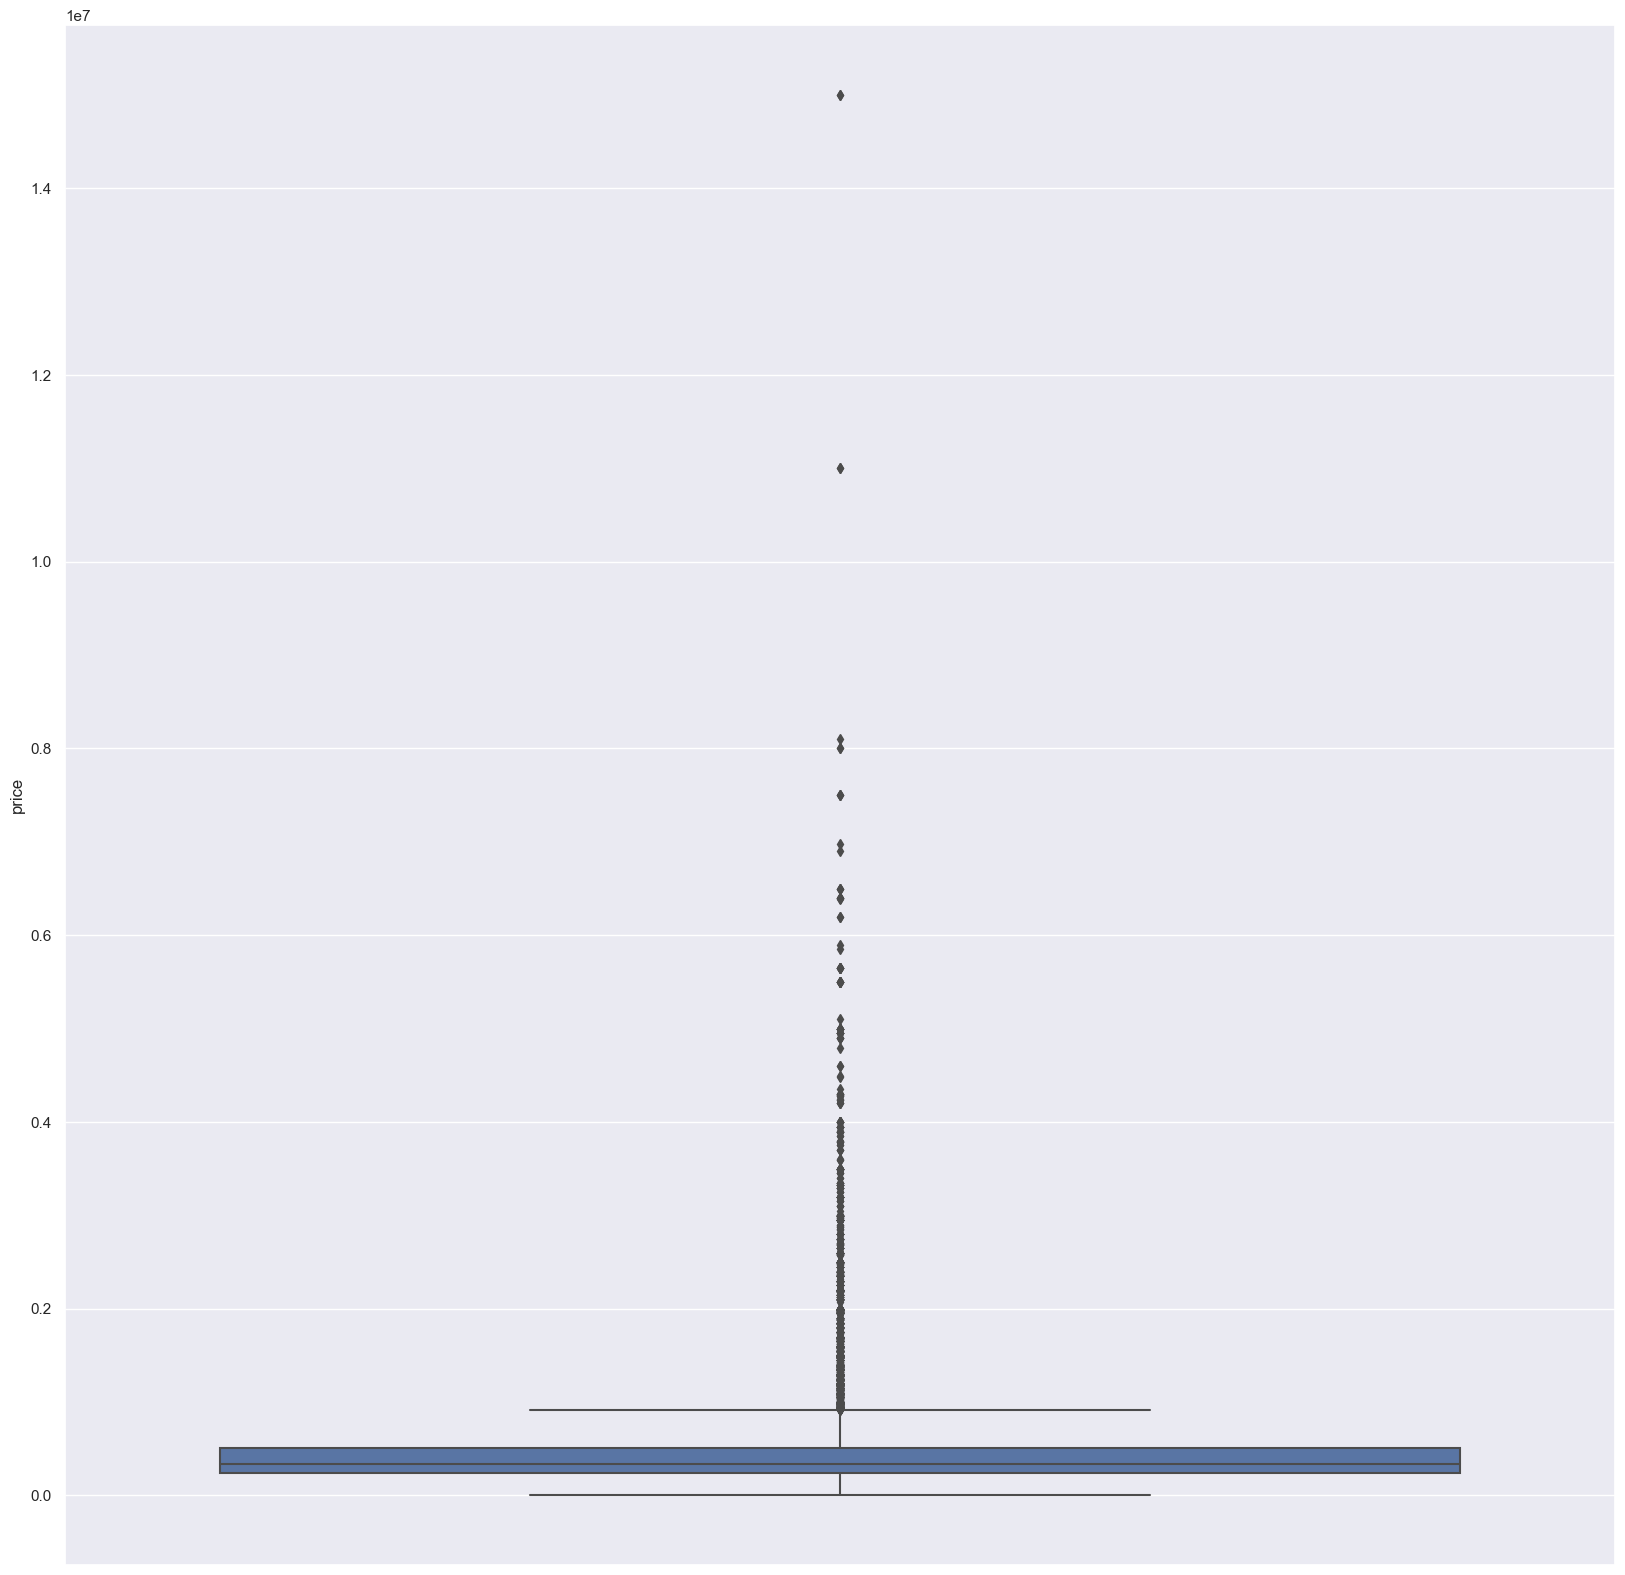

In [25]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.set(rc={"figure.figsize":(20,20)})
sns.boxplot(y=df_sale["price"])

The boxplot graph above shows that the current property price distribution is skewed to thie right with high kurtosis. This finding is indicative to datasets in which the variablity of the data is high and the extreme values are too significant. Therefore, the author feels that it is necessary to exclude the outliers. 

In [26]:
# Dropping extreme low prices

df_sale.drop(df_sale[df_sale["price"] < 100000].index, inplace=True)


C:\Users\dimas\AppData\Local\Temp\ipykernel_8932\3738198940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sale.drop(df_sale[df_sale["price"] < 100000].index, inplace=True)


In [79]:
# Dropping extreme high prices
df_sale.drop(df_sale[df_sale["price"] > 20000000].index, inplace=True)


C:\Users\dimas\AppData\Local\Temp\ipykernel_8932\1447816234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sale.drop(df_sale[df_sale["price"] > 20000000].index, inplace=True)


In [80]:
# HOW DOES df_sale LOOKS LIKE NOW
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20778 entries, 4684 to 108617
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   immo_code            20778 non-null  int64         
 1   immo_status          20778 non-null  object        
 2   price                20778 non-null  float64       
 3   publication_date     20778 non-null  datetime64[ns]
 4   listing_type         20778 non-null  object        
 5   listing_subtype      20778 non-null  object        
 6   postcode             20778 non-null  object        
 7   locality             20778 non-null  object        
 8   district             20778 non-null  object        
 9   province             20778 non-null  object        
 10  region               20778 non-null  object        
 11  epc_score            20778 non-null  object        
 12  construction_year    20778 non-null  int64         
 13  condition            20778 non-n

The boxplot graph below will show how the price distribution will be like after the exclusion of extreme values

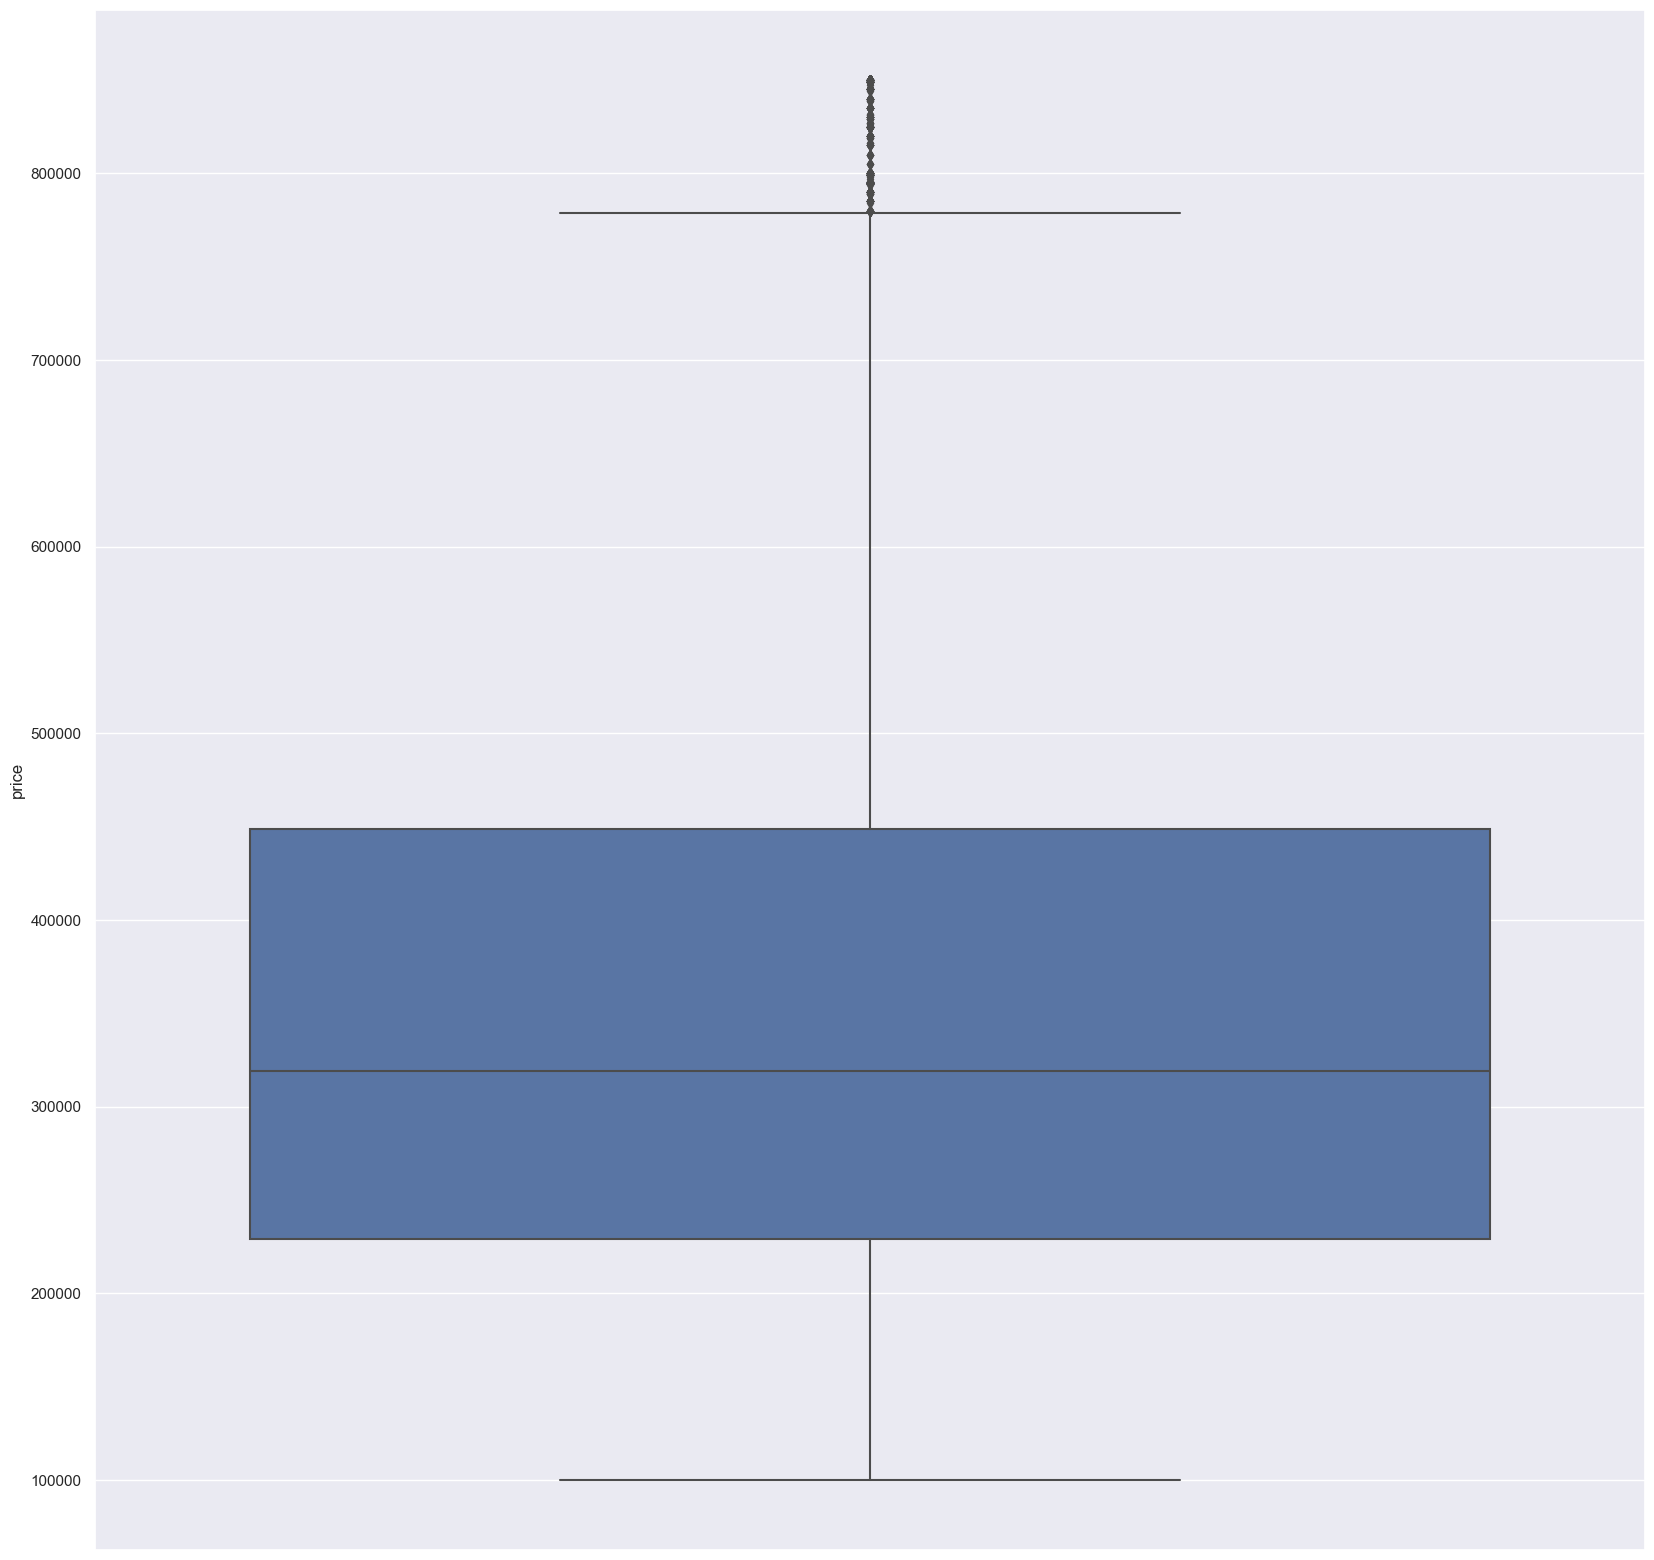

In [81]:
sns.boxplot(y=df_sale["price"])
plt.show()

The boxplot graph above shows that the price distribution is still skewed to the right with high kurtosis. However, by limiting the minimal price, the box plot shows that the the minimal price correlates better to other measures, i.e. the median, although extreme values still remain significant. This finding is also repeated through different provinces as well. The code block below will demonstrate the price variability throughout different provinces.

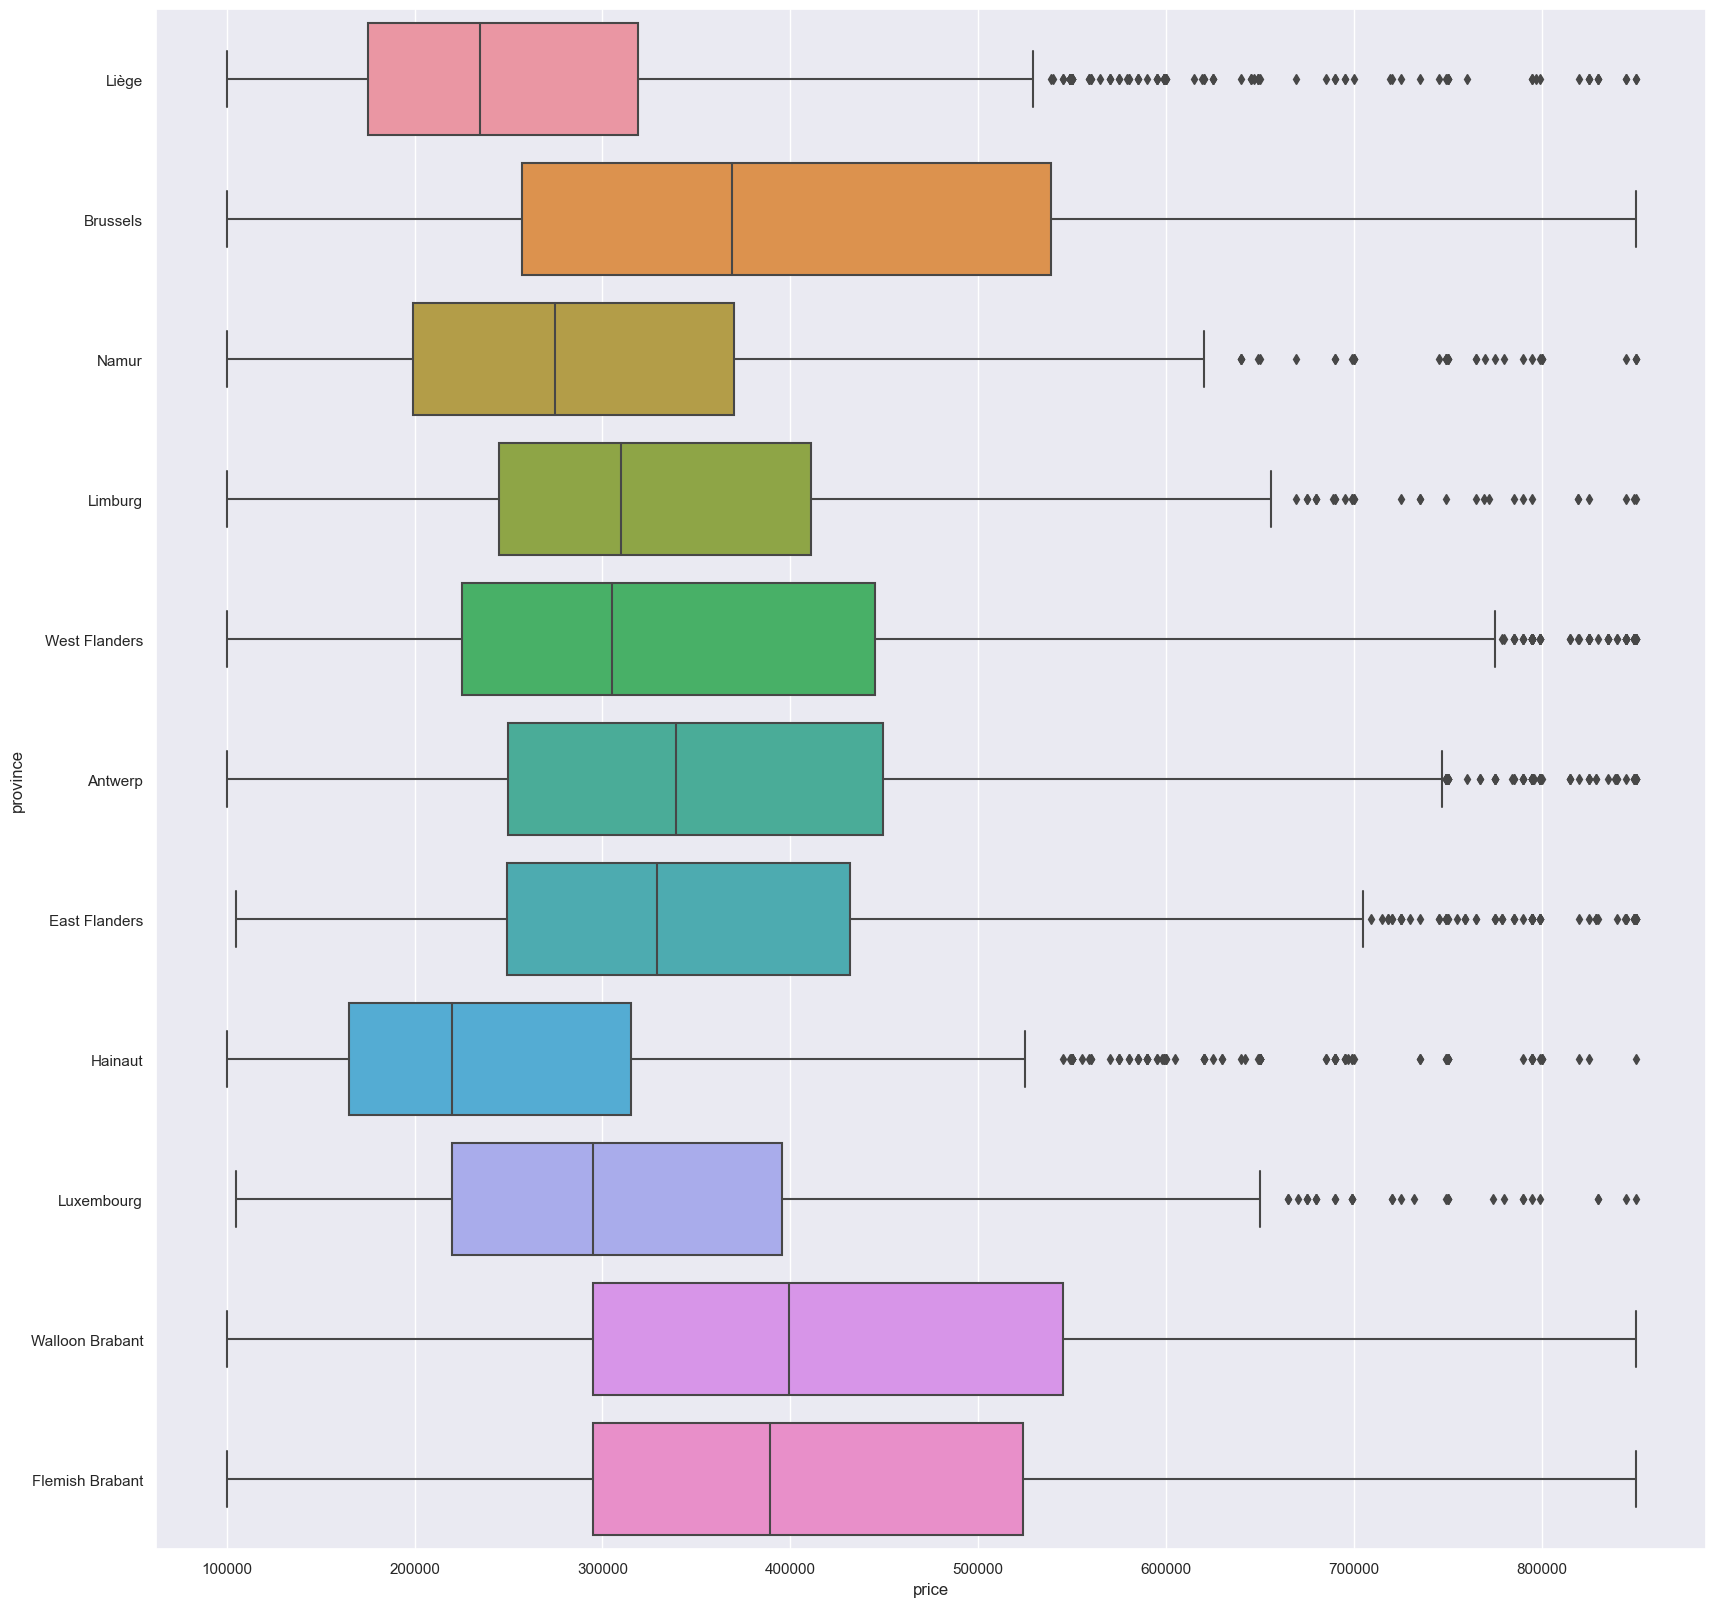

In [82]:
sns.boxplot(x=df_sale["price"], y=df_sale["province"])
plt.show()

What are the **most** expensive municipalities in Belgium? (Average price, median price, price per square meter)

### DATA ANALYSIS - FOR RENT

This section is dedicated to the analysis on the observations of real estate properties listed as for-rent in immoweb.be.
The dataset use in the section is a subset of of df_main with **df_main['immo_status'] == 'FOR_RENT'** as the common denominator. The libraries that is used throughout this section is listed as below

In [33]:
# subsetting df_main in order to create a separate DataFrame called df_rent
df_rent = df_main[df_main["immo_status"] == "FOR_RENT"]

display(df_rent)

,immo_code,immo_status,price,publication_date,listing_type,listing_subtype,postcode,locality,district,province,...,toilet_count,room_count,kitchen,dining_room,has_lift,has_basement,has_internet,has_disabled_access,realtor_poc,districy
26142,10591896,FOR_RENT,8500.0,2023-05-26,HOUSE,HOUSE,1180,Uccle,Brussels,Brussels,...,5,5,HYPER_EQUIPPED,UNKNOWN,False,True,UNKNOWN,True,Engel & Völkers Fort Jaco,Brussels
26437,10684488,FOR_RENT,850.0,2023-07-07,APARTMENT,APARTMENT,7000,Mons,Mons,Hainaut,...,1,0,HYPER_EQUIPPED,UNKNOWN,True,UNKNOWN,UNKNOWN,True,Alliance Partners,Mons
27868,10648036,FOR_RENT,850.0,2023-06-20,HOUSE,HOUSE,8970,Poperinge,Ieper,West Flanders,...,2,0,INSTALLED,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Immo Droom,Ieper
27918,10673811,FOR_RENT,850.0,2023-07-03,HOUSE,HOUSE,5640,Mettet,Namur,Namur,...,0,0,INSTALLED,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,CENTURY 21 Beaux Villages,Namur
27920,10677101,FOR_RENT,900.0,2023-07-04,HOUSE,HOUSE,5640,Biesme,Namur,Namur,...,0,0,INSTALLED,UNKNOWN,UNKNOWN,True,UNKNOWN,UNKNOWN,CENTURY 21 Beaux Villages,Namur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123047,10653945,FOR_RENT,850.0,2023-06-23,APARTMENT,APARTMENT,3080,Tervuren,Leuven,Flemish Brabant,...,1,0,SEMI_EQUIPPED,UNKNOWN,True,True,UNKNOWN,UNKNOWN,Home Consult,Leuven
123048,10677106,FOR_RENT,585.0,2023-07-04,APARTMENT,FLAT_STUDIO,2000,Antwerp,Antwerp,Antwerp,...,1,0,INSTALLED,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Maris Makelaars bvba,Antwerp
123050,10676686,FOR_RENT,840.0,2023-07-04,APARTMENT,GROUND_FLOOR,9050,Gentbrugge,Gent,East Flanders,...,1,0,INSTALLED,True,False,UNKNOWN,True,False,UNKNOWN,Gent
123053,10672699,FOR_RENT,640.0,2023-07-02,APARTMENT,APARTMENT,1770,Liedekerke,Halle-Vilvoorde,Flemish Brabant,...,0,0,SEMI_EQUIPPED,UNKNOWN,False,UNKNOWN,True,False,UNKNOWN,Halle-Vilvoorde


In [34]:
# displaying general overview of df_rent and its columns
with pd.option_context("display.max_rows", None,
                       "display.max_columns", None
):
    display(df_rent.info(),
            df_rent["listing_type"].value_counts(),
            df_rent["listing_subtype"].value_counts(),
            df_rent["district"].value_counts(),
            df_rent["region"].value_counts(),
            df_rent["province"].value_counts(),
            df_rent["construction_year"].value_counts(),
            df_rent["condition"].value_counts(),
            df_rent["epc_score"].value_counts(),
            df_rent["kitchen"].value_counts(),
            df_rent["dining_room"].value_counts(), 
            df_rent["has_lift"].value_counts(),
            df_rent["has_basement"].value_counts(),
            df_rent["has_internet"].value_counts(),
            df_rent["has_disabled_access"].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 13420 entries, 26142 to 123054
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   immo_code            13420 non-null  int64         
 1   immo_status          13420 non-null  object        
 2   price                13420 non-null  float64       
 3   publication_date     13420 non-null  datetime64[ns]
 4   listing_type         13420 non-null  object        
 5   listing_subtype      13420 non-null  object        
 6   postcode             13420 non-null  object        
 7   locality             13420 non-null  object        
 8   district             13420 non-null  object        
 9   province             13420 non-null  object        
 10  region               13420 non-null  object        
 11  epc_score            13420 non-null  object        
 12  construction_year    13420 non-null  int64         
 13  condition            13420 non-

None

listing_type
APARTMENT    10452
HOUSE         2968
Name: count, dtype: int64

listing_subtype
APARTMENT               7928
HOUSE                   2211
DUPLEX                   744
FLAT_STUDIO              619
VILLA                    454
GROUND_FLOOR             442
PENTHOUSE                311
KOT                      182
LOFT                      97
SERVICE_FLAT              80
TOWN_HOUSE                77
EXCEPTIONAL_PROPERTY      72
MANSION                   57
TRIPLEX                   49
MIXED_USE_BUILDING        28
BUNGALOW                  25
COUNTRY_COTTAGE           21
APARTMENT_BLOCK           11
MANOR_HOUSE                5
OTHER_PROPERTY             4
CHALET                     2
FARMHOUSE                  1
Name: count, dtype: int64

district
Brussels             3773
Antwerp              1032
Nivelles              710
Gent                  618
Leuven                585
Liège                 566
Brugge                552
Halle-Vilvoorde       504
Namur                 476
Charleroi             355
Mons                  351
Kortrijk              290
Mechelen              261
Turnhout              260
Aalst                 235
Tournai               221
Dendermonde           217
Verviers              214
Hasselt               207
Sint-Niklaas          181
Oudenaarde            168
Oostend               162
Soignies              151
Roeselare             123
Tielt                 111
Dinant                107
Eeklo                  98
Mouscron               76
Ath                    73
Huy                    72
Veurne                 71
Ieper                  67
Arlon                  64
Neufchâteau            62
Diksmuide              59
Waremme                52
Thuin                  52
Bastogne               51
Maa

region
Flanders    5898
Brussels    3773
Wallonie    3749
Name: count, dtype: int64

province
Brussels           3773
Antwerp            1553
East Flanders      1517
West Flanders      1435
Hainaut            1279
Flemish Brabant    1089
Liège               904
Walloon Brabant     710
Namur               607
Limburg             304
Luxembourg          249
Name: count, dtype: int64

construction_year
0       7643
2023     364
2022     318
2017     197
2020     194
2021     193
2019     188
2018     159
2016     156
1970     151
2015     146
1960     145
2014     136
1930     134
2012     133
2008     119
2005     116
1950     113
2010     101
2013      98
1900      96
2000      93
2009      88
2007      78
2006      77
2004      76
2011      73
1980      71
1920      66
1975      64
1991      56
1965      56
1990      55
2002      53
1995      50
1958      49
2001      49
1971      45
2003      43
1972      43
1996      40
1969      39
1997      38
1999      38
1993      37
1973      37
1998      35
1992      35
1976      35
1994      35
1974      34
1968      33
1977      31
1910      30
1978      27
1966      25
1956      25
1964      24
1967      23
1988      22
1963      22
1985      22
1962      21
1986      21
1961      20
1955      19
1984      19
1989      19
1936      18
1935      18
1940      18
1925      18
1932      16
1954      16
1987      16
1979   

condition
AS_NEW            4867
GOOD              3904
UNKNOWN           3382
JUST_RENOVATED    1230
TO_BE_DONE_UP       27
TO_RENOVATE          6
TO_RESTORE           4
Name: count, dtype: int64

epc_score
B          3548
C          2483
UNKNOWN    2193
D          1670
A          1438
E           920
F           587
G           496
A+           71
A++          13
B_A++         1
Name: count, dtype: int64

kitchen
INSTALLED             4368
UNKNOWN               3715
HYPER_EQUIPPED        2435
USA_HYPER_EQUIPPED    1296
SEMI_EQUIPPED          781
USA_INSTALLED          476
NOT_INSTALLED          187
USA_SEMI_EQUIPPED      139
USA_UNINSTALLED         23
Name: count, dtype: int64

dining_room
UNKNOWN    11314
True        2106
Name: count, dtype: int64

has_lift
True       5182
False      4833
UNKNOWN    3405
Name: count, dtype: int64

has_basement
UNKNOWN    8447
True       4973
Name: count, dtype: int64

has_internet
UNKNOWN    11508
True        1151
False        761
Name: count, dtype: int64

has_disabled_access
UNKNOWN    7510
False      4598
True       1312
Name: count, dtype: int64

In [35]:
# How many rows and columns?

print(f"There are {df_rent.shape[0]} rows and {df_rent.shape[1]} columns in 'df_rent' ")

There are 13420 rows and 29 columns in 'df_rent' 


In [36]:
# How many missing values df_rent['construction_year']?

construction_year = pd.DataFrame(df_rent["construction_year"].value_counts()).reset_index()

missing_year = construction_year["count"][0] / construction_year["count"].sum()*100

print(f"The percentage of missing value in df_rent['construction_year']  is {missing_year}")


The percentage of missing value in df_rent['construction_year']  is 56.952309985096875


In [37]:
# How many missing values df_rent['condition']?

condition = pd.DataFrame(df_rent["condition"].value_counts()).reset_index()

missing_condition = condition["count"][0] / condition["count"].sum()*100

print(f"The percentage of missing value in df_rent['condition']  is {missing_condition}")

The percentage of missing value in df_rent['condition']  is 36.26676602086438


In [38]:
# How many missing values df_rent['epc_score']?

epc_score = pd.DataFrame(df_rent["epc_score"].value_counts()).reset_index()

missing_epc_score = epc_score["count"][0] / epc_score["count"].sum()*100

print(f"The percentage of missing value in df_rent['epc_score']  is {missing_epc_score}")

The percentage of missing value in df_rent['epc_score']  is 26.438152011922504


In [39]:
# How many missing values df_rent['kitchen']?

kitchen = pd.DataFrame(df_rent["kitchen"].value_counts()).reset_index()

missing_kitchen = kitchen["count"][0] / kitchen["count"].sum()*100

print(f"The percentage of missing value in df_rent['kitchen']  is {missing_kitchen}")

The percentage of missing value in df_rent['kitchen']  is 32.54843517138599


In [40]:
# How many missing values df_rent['dining_room']?

dining_room = pd.DataFrame(df_rent["dining_room"].value_counts()).reset_index()

missing_dining_room = dining_room["count"][0] / dining_room["count"].sum()*100

print(f"The percentage of missing value in df_rent['dining_room']  is {missing_dining_room}")

The percentage of missing value in df_rent['dining_room']  is 84.30700447093889


In [41]:
# How many missing values df_rent['has_lift']?

has_lift = pd.DataFrame(df_rent["has_lift"].value_counts()).reset_index()

missing_has_lift = has_lift["count"][0] / has_lift["count"].sum()*100

print(f"The percentage of missing value in df_rent['has_lift']  is {missing_has_lift}")

The percentage of missing value in df_rent['has_lift']  is 38.61400894187779


In [42]:
# How many missing values df_rent['has_basement']?

has_basement = pd.DataFrame(df_rent["has_basement"].value_counts()).reset_index()

missing_has_basement = has_basement["count"][0] / has_basement["count"].sum()*100

print(f"The percentage of missing value in df_rent['has_basement']  is {missing_has_basement}")

The percentage of missing value in df_rent['has_basement']  is 62.94336810730253


In [43]:
# How many missing values df_rent['has_internet']?

has_internet = pd.DataFrame(df_rent["has_internet"].value_counts()).reset_index()

missing_has_internet = has_internet["count"][0] / has_internet["count"].sum()*100

print(f"The percentage of missing value in df_rent['has_internet']  is {missing_has_internet}")

The percentage of missing value in df_rent['has_internet']  is 85.75260804769002


In [44]:
# How many missing values df_rent['has_disabled_access']?

has_disabled_access = pd.DataFrame(df_rent["has_disabled_access"].value_counts()).reset_index()

missing_has_disabled_access = has_disabled_access["count"][0] / has_disabled_access["count"].sum()*100

print(f"The percentage of missing value in df_rent['has_disabled_access']  is {missing_has_disabled_access}")

The percentage of missing value in df_rent['has_disabled_access']  is 55.9612518628912


In [45]:
# what is the average missing values across columns?

missing_average = (missing_year + missing_condition + missing_epc_score + missing_kitchen + missing_dining_room + missing_has_lift + missing_has_basement + missing_has_internet + missing_has_disabled_access) / 9

print(f"The average missing values across columns in df_rent is {missing_average}")

The average missing values across columns in df_rent is 53.30932273555225


The author suspects that the same thing that is happening with the df_sale's missing value also takes place in df_rent 

<h2 style='text-align: center;'> DATA INTERPRETATION </h2>

### TAKING A SNAPSHOT AT BELGIUM'S HOUSING MARKET - SINGLE RESIDENTIAL HOUSES - FOR SALE
This section is dedicated to the conducting the analysis of Belgium housing market for single residential houses listed as 'FOR_SALE'.

To start, it is interesting to gain insight on how the property prices in the sampled observation is distributed without taking other variables into account. This action is taken to determine the variability of the values so that the outliers of property prices can be spotted. The code below will generate distribution plots based on the **df_sale['listing_type']** . This section will divulge on the price distribution for properties classified as __HOUSE__ in **df_sale['listing_type']**

In [85]:
# Subsetting df_sale to create reshouse_df : a DataFrame with 'df_sale[df_sale["listing_subtype"] == "HOUSE"]' as common denominator 
reshouse_df = df_sale[df_sale["listing_subtype"] == "HOUSE"]
reshouse_df["price"].describe()

count      8957.000000
mean     352344.491571
std      158227.553391
min      100000.000000
25%      235000.000000
50%      328000.000000
75%      440000.000000
max      850000.000000
Name: price, dtype: float64

In [86]:
# summary statistics in reshouse_df
reshouse_std = reshouse_df["price"].std()
reshouse_mean = reshouse_df["price"].mean()
reshouse_median = reshouse_df["price"].median()
reshouse_max = reshouse_df["price"].max()
reshouse_min = reshouse_df["price"].min()


print(f"""
standard deviation = {reshouse_std}
mean = {reshouse_mean}
median = {reshouse_median}
min ={reshouse_min}
max = {reshouse_max}
median to std = {reshouse_std - reshouse_median}
""")


standard deviation = 158227.5533913547
mean = 352344.49157083844
median = 328000.0
min =100000.0
max = 850000.0
median to std = -169772.4466086453



It can be inferred there the extreme values in reshouse_df has skewed the distribution of the property prices, but how skewed will it be? The code block below will generate a box plot to visualize the the property price distribution in this category based on the provinces in which the properties are located


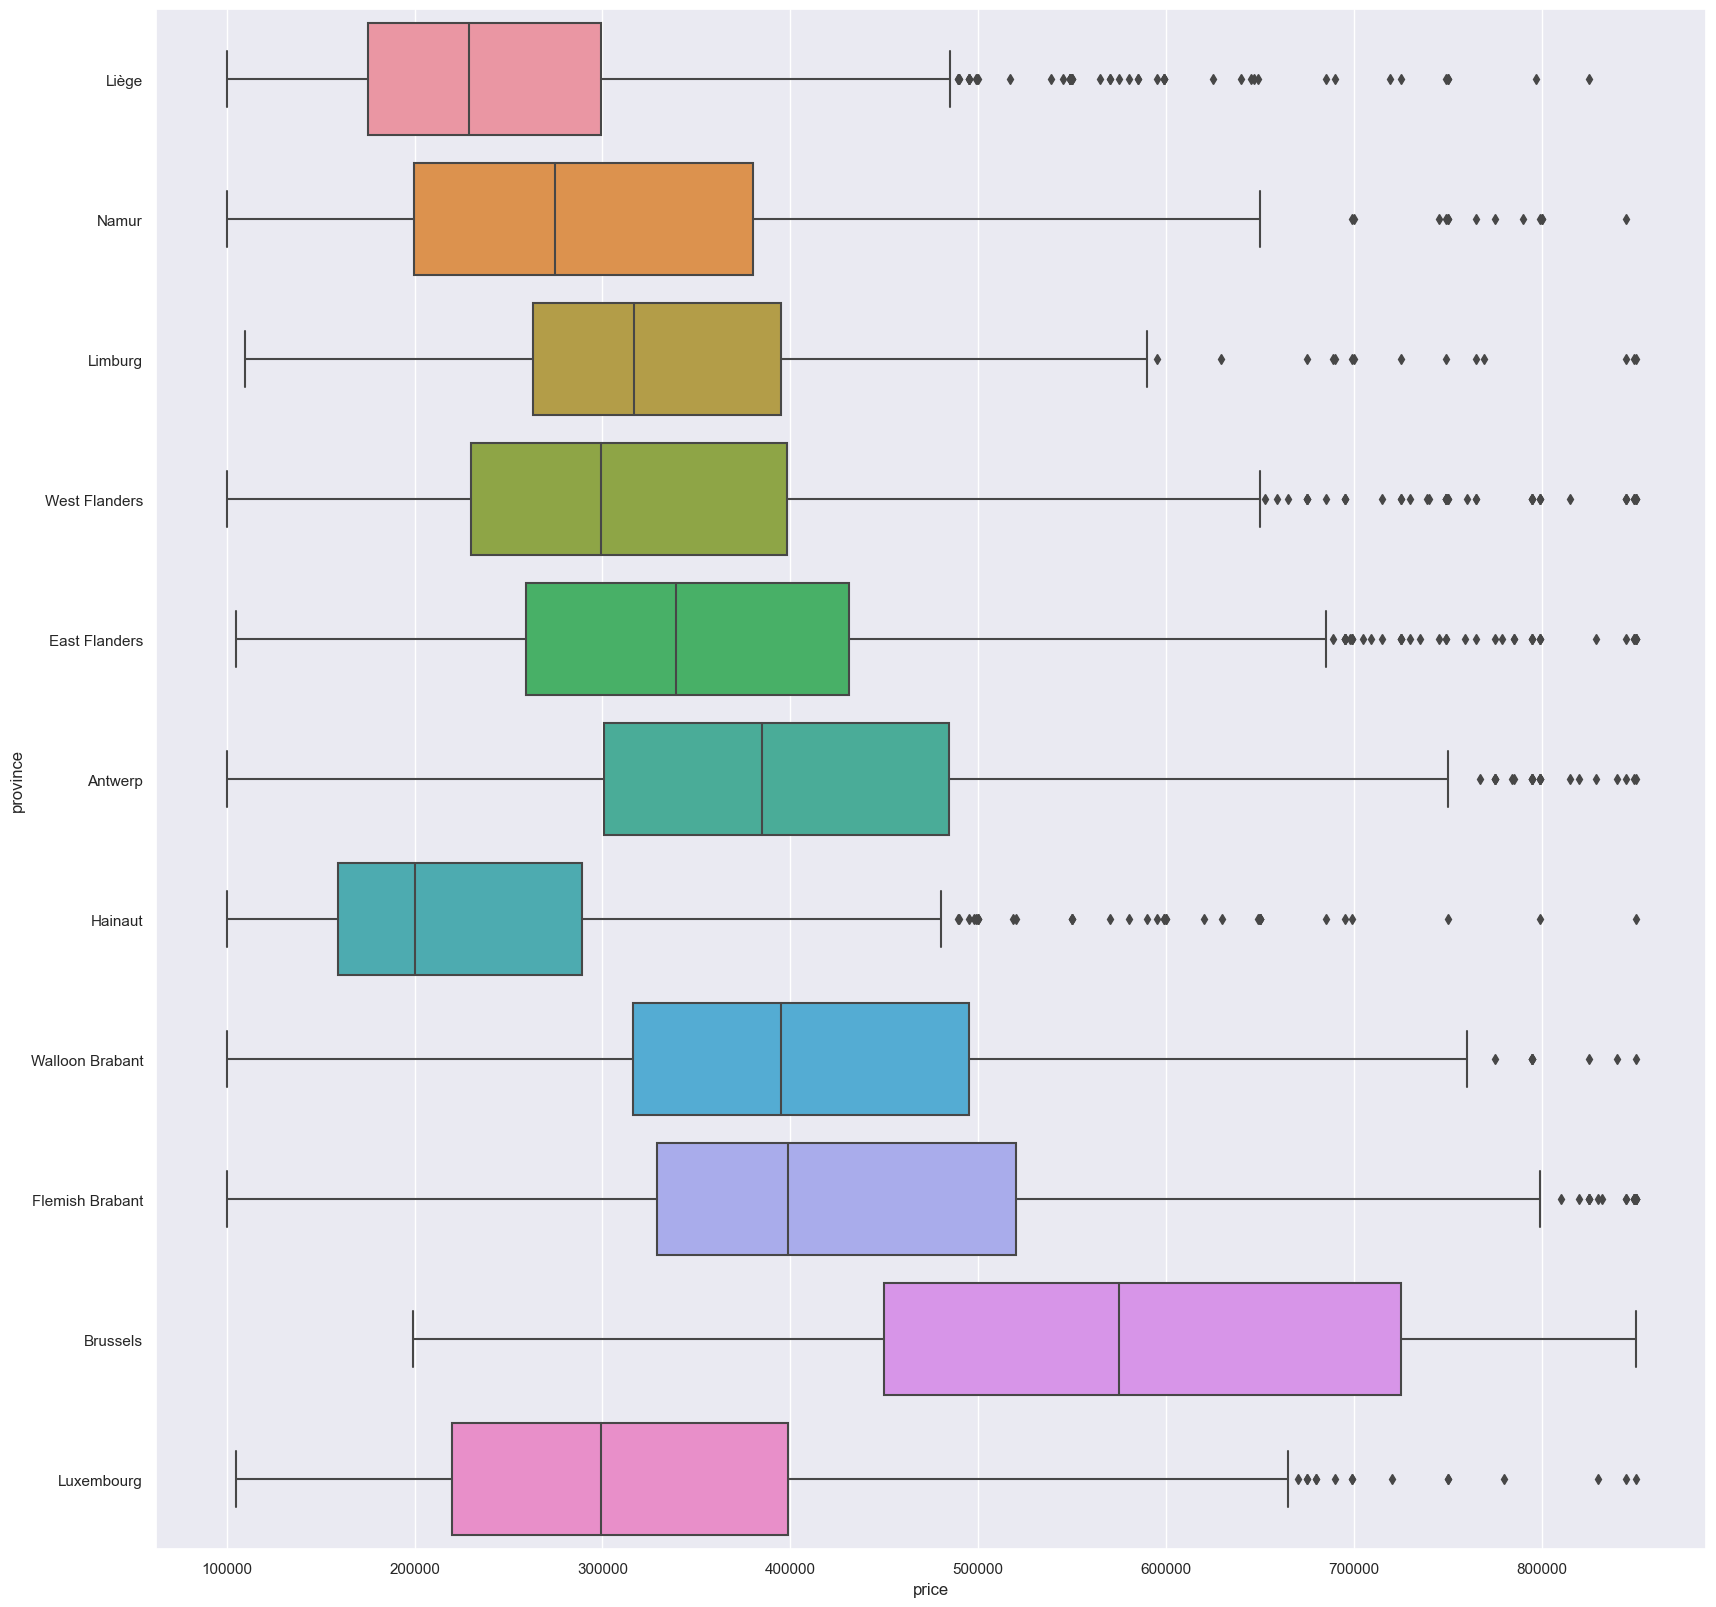

In [87]:
# plotting price distribution per province
sns.boxplot(x=reshouse_df["price"], y=reshouse_df["province"])
plt.show()


The boxplot graph above shows that houses in Brussels are priced at a much higher rate than any other provinces in Belgium. 

#### HOW DOES OTHER VARIABLES CORRELATE TO PRICE?

This section will explore the possible correlation between house prices and other contributing variables, such as "plot_size", "bathroom_count", "toilet_count", "bedroom_count", and "room_count". These variables are chosen due to simply the fact that they are continuous variables, which it possible to conduct quantitative analysis upon. Those variables have ben grouped inside 'compare_to_price' variable 

In [103]:
compare_to_price = pd.DataFrame(reshouse_df[["price", "plot_size", "bathroom_count", "toilet_count", "bedroom_count", "room_count"]])

compare_to_price

,price,plot_size,bathroom_count,toilet_count,bedroom_count,room_count
4684,159000.0,300.0,1,1,3,0
9663,295000.0,1015.0,1,1,3,0
14870,295000.0,1019.0,1,0,3,0
15599,575000.0,1015.0,1,2,3,0
17798,265000.0,570.0,1,2,3,0
...,...,...,...,...,...,...
100015,268500.0,50.0,1,2,3,0
100017,249000.0,400.0,1,1,3,0
100018,315000.0,504.0,1,2,4,0
100020,185000.0,507.0,1,2,2,0


The code block below will plot the correlation between house price and other variables predefined above. 

c:\Users\dimas\Desktop\BECODE\PROJECTS\project-immobel\project-immobel\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


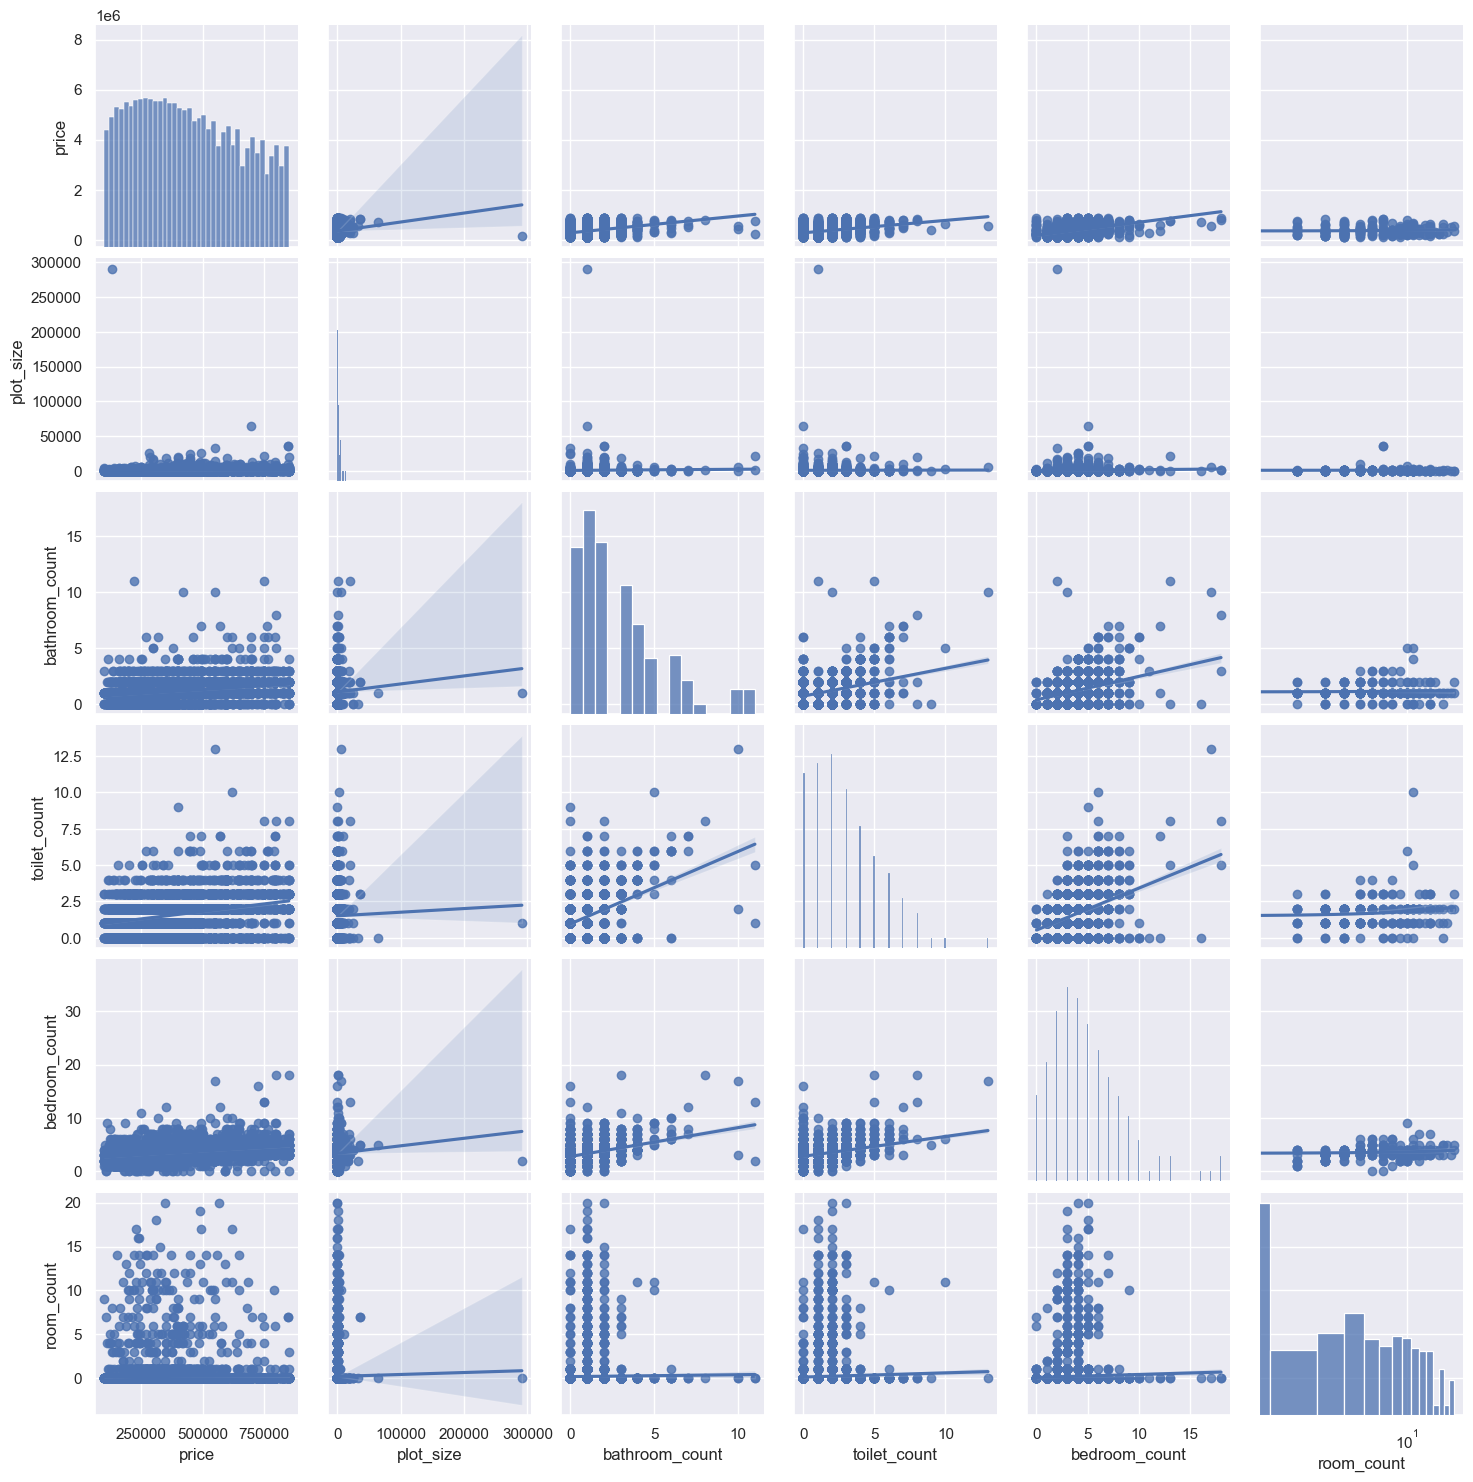

In [110]:
# plotting correlation between price and other variables in pairplot
sns.pairplot(compare_to_price, kind="reg")
plt.xscale("log")
plt.yscale("log")

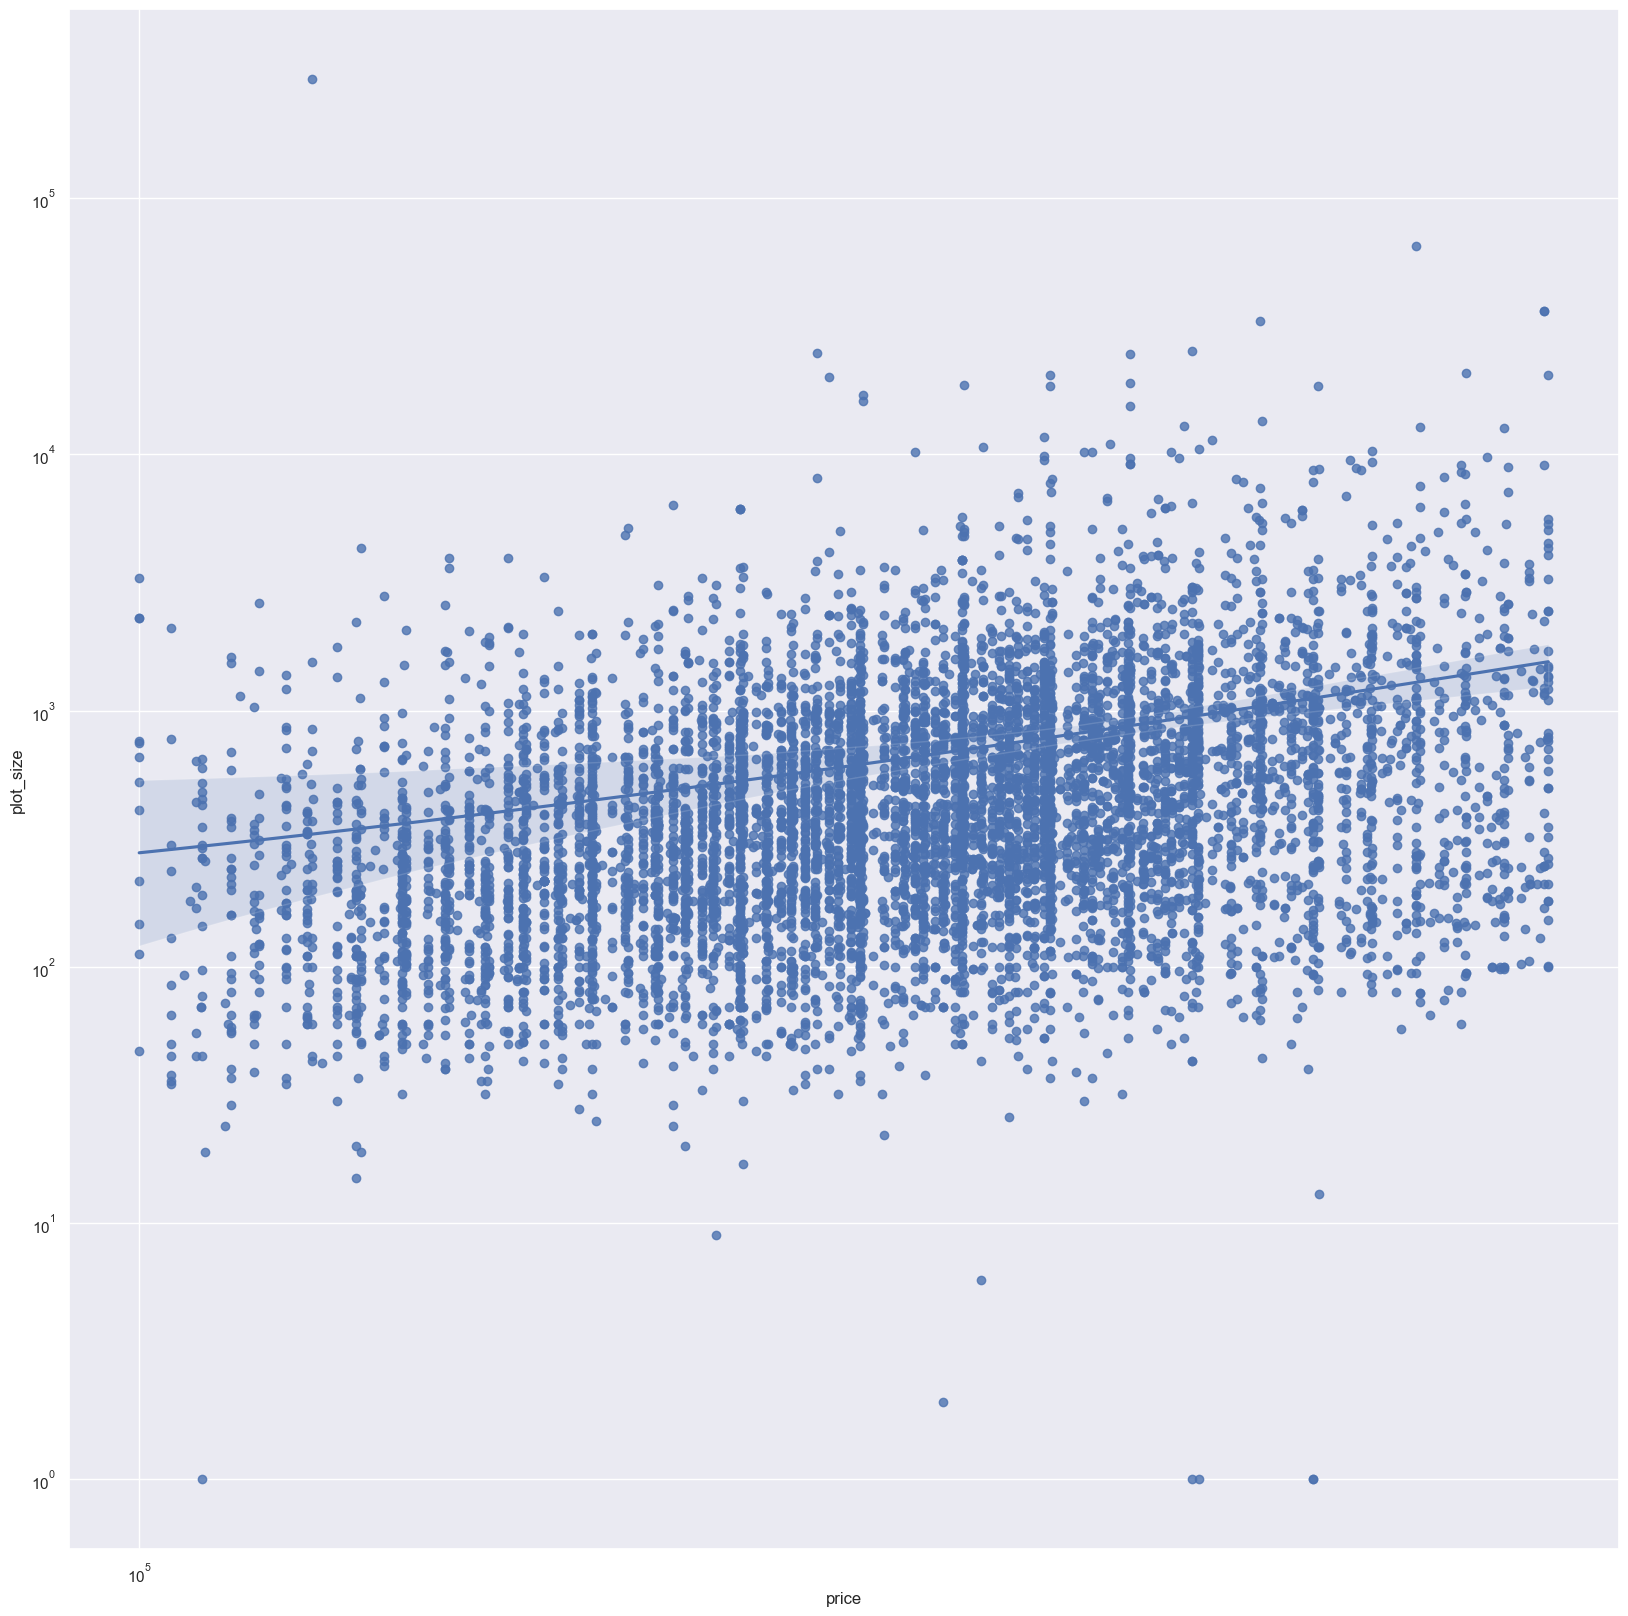

In [160]:
# correlation between price and plot_size
sns.regplot(x=compare_to_price["price"], y=compare_to_price["plot_size"])
plt.xscale("log")
plt.yscale("log")
plt.show()

In [177]:
# grouping df_sale based on "price", "postcode", "district", "province", "region"
grouped_item = pd.DataFrame(reshouse_df[["price", "postcode", "district", "province", "region"]]).reset_index()
del grouped_item["index"]




In [178]:
# Highest Mean Price - In Belgium
grouped_item_district_province = grouped_item.groupby(["district", "province", "region"])
price_region_average = pd.DataFrame(grouped_item_district_province["price"].mean().round().sort_values(ascending=False)).reset_index()
price_region_average["average_price"] = price_region_average["price"]
del price_region_average["price"]

price_region_average[:5]

,district,province,region,average_price
0,Brussels,Brussels,Brussels,580200.0
1,Halle-Vilvoorde,Flemish Brabant,Flanders,448249.0
2,Antwerp,Antwerp,Flanders,422715.0
3,Nivelles,Walloon Brabant,Wallonie,420436.0
4,Gent,East Flanders,Flanders,411417.0


In [162]:
# Lowest Mean Price - In Belgium
price_region_average[-5:]

,district,province,region,average_price
38,Liège,Liège,Wallonie,242135.0
39,Philippeville,Namur,Wallonie,241046.0
40,Thuin,Hainaut,Wallonie,234453.0
41,Charleroi,Hainaut,Wallonie,211445.0
42,Mons,Hainaut,Wallonie,209243.0


In [159]:
# Highest Median Price - In Belgium

grouped_item_district_province = grouped_item.groupby(["district", "province", "region"])
price_region_median = pd.DataFrame(grouped_item_district_province["price"].median().round().sort_values(ascending=False)).reset_index()
price_region_median["median_price"] = price_region_median["price"]
del price_region_median["price"]

price_region_median[:5]

,district,province,region,median_price
0,Brussels,Brussels,Brussels,575000.0
1,Halle-Vilvoorde,Flemish Brabant,Flanders,429000.0
2,Antwerp,Antwerp,Flanders,397000.0
3,Nivelles,Walloon Brabant,Wallonie,395000.0
4,Gent,East Flanders,Flanders,390000.0


In [164]:
# Lowest Median Price - In Belgium
price_region_median[-5:]

,district,province,region,median_price
38,Mouscron,Hainaut,Wallonie,215000.0
39,Thuin,Hainaut,Wallonie,199000.0
40,Philippeville,Namur,Wallonie,195000.0
41,Charleroi,Hainaut,Wallonie,185000.0
42,Mons,Hainaut,Wallonie,185000.0


In [ ]:
# grouping df_sale based on df_sale["province"] and visualising the median price of properties for sale per province in Belgium
province_group = df_sale.groupby("province")
median_province = province_group["price"].median().round()



province
Antwerp            339000.0
Brussels           369000.0
East Flanders      329000.0
Flemish Brabant    389000.0
Hainaut            220000.0
Limburg            310000.0
Liège              235000.0
Luxembourg         294900.0
Namur              274625.0
Walloon Brabant    399500.0
West Flanders      305000.0
Name: price, dtype: float64

In [165]:
# Highest Mean Price - In Flanders
grouped_item_district_province = grouped_item.groupby(["district", "province", "region"])
price_region_average = pd.DataFrame(grouped_item_district_province["price"].mean().round().sort_values(ascending=False)).reset_index()
price_region_average["average_price"] = price_region_average["price"]
del price_region_average["price"]

price_region_average[price_region_average["region"] == "Flanders"][:5]

,district,province,region,average_price
1,Halle-Vilvoorde,Flemish Brabant,Flanders,448249.0
2,Antwerp,Antwerp,Flanders,422715.0
4,Gent,East Flanders,Flanders,411417.0
5,Mechelen,Antwerp,Flanders,406974.0
7,Leuven,Flemish Brabant,Flanders,396554.0


In [166]:
# Lowest Mean Price - In Flanders
price_region_average[price_region_average["region"] == "Flanders"][-5:]

,district,province,region,average_price
23,Oudenaarde,East Flanders,Flanders,314069.0
24,Tongeren,Limburg,Flanders,312437.0
28,Kortrijk,West Flanders,Flanders,303213.0
29,Diksmuide,West Flanders,Flanders,295028.0
32,Ieper,West Flanders,Flanders,275944.0


In [168]:
# Highest Median Price - In Flanders
grouped_item_district_province = grouped_item.groupby(["district", "province", "region"])
price_region_median = pd.DataFrame(grouped_item_district_province["price"].median().round().sort_values(ascending=False)).reset_index()
price_region_median["median_price"] = price_region_median["price"]
del price_region_median["price"]

price_region_median[price_region_median["region"] == "Flanders"][:5]

,district,province,region,median_price
1,Halle-Vilvoorde,Flemish Brabant,Flanders,429000.0
2,Antwerp,Antwerp,Flanders,397000.0
4,Gent,East Flanders,Flanders,390000.0
5,Mechelen,Antwerp,Flanders,380000.0
6,Leuven,Flemish Brabant,Flanders,370000.0


In [170]:
# Lowest Median Price - In Flanders
price_region_median[price_region_median["region"] == "Flanders"][-5:]

,district,province,region,median_price
24,Roeselare,West Flanders,Flanders,292750.0
26,Diksmuide,West Flanders,Flanders,289000.0
27,Tongeren,Limburg,Flanders,285000.0
29,Kortrijk,West Flanders,Flanders,279000.0
31,Ieper,West Flanders,Flanders,259000.0


In [172]:
# Highest Mean Price - In Wallonie
grouped_item_district_province = grouped_item.groupby(["district", "province", "region"])
price_region_average = pd.DataFrame(grouped_item_district_province["price"].mean().round().sort_values(ascending=False)).reset_index()
price_region_average["average_price"] = price_region_average["price"]
del price_region_average["price"]

price_region_average[price_region_average["region"] == "Wallonie"][:5]

,district,province,region,average_price
3,Nivelles,Walloon Brabant,Wallonie,420436.0
6,Arlon,Luxembourg,Wallonie,400582.0
16,Bastogne,Luxembourg,Wallonie,333381.0
17,Namur,Namur,Wallonie,329122.0
19,Marche-en-Famenne,Luxembourg,Wallonie,322059.0


In [173]:
# Lowest Mean Price - In Wallonie
price_region_average[price_region_average["region"] == "Wallonie"][-5:]

,district,province,region,average_price
38,Liège,Liège,Wallonie,242135.0
39,Philippeville,Namur,Wallonie,241046.0
40,Thuin,Hainaut,Wallonie,234453.0
41,Charleroi,Hainaut,Wallonie,211445.0
42,Mons,Hainaut,Wallonie,209243.0


In [174]:
# Highest Median Price - In Wallonie
grouped_item_district_province = grouped_item.groupby(["district", "province", "region"])
price_region_median = pd.DataFrame(grouped_item_district_province["price"].median().round().sort_values(ascending=False)).reset_index()
price_region_median["median_price"] = price_region_median["price"]
del price_region_median["price"]

price_region_median[price_region_median["region"] == "Wallonie"][:5]

,district,province,region,median_price
3,Nivelles,Walloon Brabant,Wallonie,395000.0
9,Arlon,Luxembourg,Wallonie,365000.0
12,Bastogne,Luxembourg,Wallonie,347000.0
17,Marche-en-Famenne,Luxembourg,Wallonie,300000.0
18,Namur,Namur,Wallonie,299000.0


In [176]:
# Lowest Median Price - In Wallonie
price_region_median[price_region_median["region"] == "Wallonie"][-5:]

,district,province,region,median_price
38,Mouscron,Hainaut,Wallonie,215000.0
39,Thuin,Hainaut,Wallonie,199000.0
40,Philippeville,Namur,Wallonie,195000.0
41,Charleroi,Hainaut,Wallonie,185000.0
42,Mons,Hainaut,Wallonie,185000.0


Due to time constraint, the author regrets that it is not possible to provide analysis on price per square meter in various municipalities in Belgium

### TAKING A SNAPSHOT AT BELGIUM'S HOUSING MARKET - SINGLE RESIDENTIAL APARTMENTS - FOR SALE

It is interesting to gain insight on how the property prices in the sampled observation is distributed without taking other variables into account. This action is taken to determine the variability of the values so that the outliers of property prices can be spotted. The code below will generate distribution plots based on the **df_sale['listing_type']** . This section will divulge on the price distribution for properties classified as __APARTMENT__ in *df_sale['listing_type']*

In [88]:
# Subsetting df_sale to create resapartments_df : a DataFrame with 'df_sale[df_sale["listing_type"] == "HOUSE"]' as common denominator 
resapartments_df = df_sale[df_sale["listing_type"] == "APARTMENT"]
resapartments_df["price"].describe()

count      9047.000000
mean     320256.058362
std      152289.776223
min      100000.000000
25%      215000.000000
50%      279900.000000
75%      385000.000000
max      850000.000000
Name: price, dtype: float64

In [89]:
# descriptive statistics in resapartments_df
resapartments_std = resapartments_df["price"].std()
resapartments_mean = resapartments_df["price"].mean()
resapartments_median = resapartments_df["price"].median()
resapartments_max = resapartments_df["price"].max()
resapartments_min = resapartments_df["price"].min()

print(f"""
standard deviation = {resapartments_std}
mean = {resapartments_mean}
median = {resapartments_median}
min ={resapartments_min}
max = {resapartments_max}
""")


standard deviation = 152289.77622260078
mean = 320256.05836188793
median = 279900.0
min =100000.0
max = 850000.0



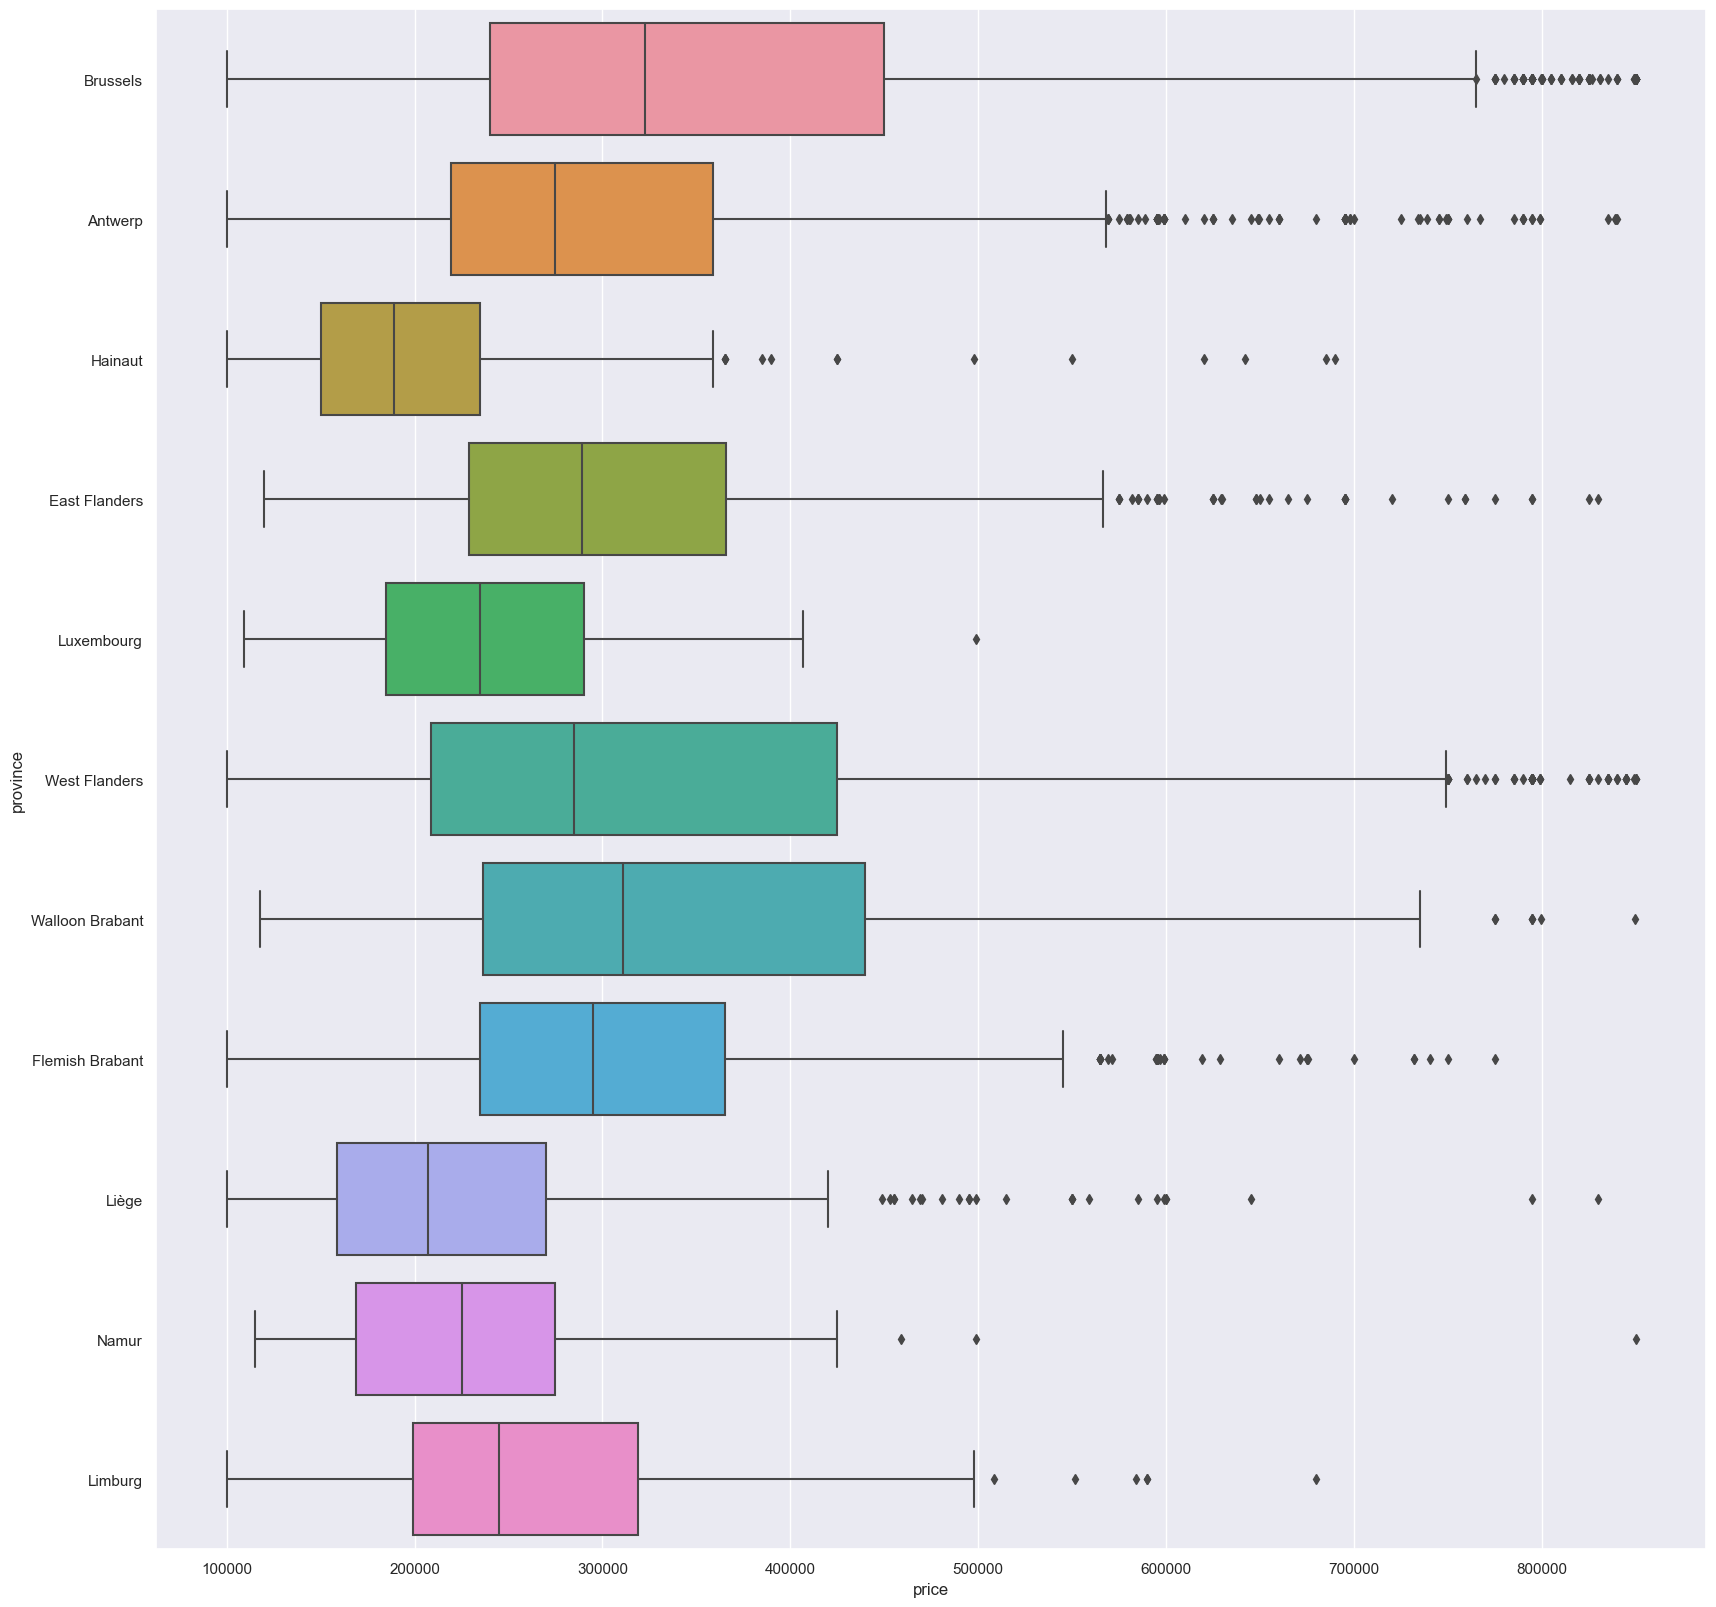

In [158]:
# plotting price distribution per province
sns.boxplot(x=resapartments_df["price"], y=resapartments_df["province"])
plt.show()


The boxplot graph above shows that the price distribution of single residential apartments shares similar pattern to those of single residential houses. 

#### HOW DOES OTHER VARIABLES CORRELATE TO PRICE?

This section will explore the possible correlation between house prices and other contributing variables, such as "plot_size", "bathroom_count", "toilet_count", "bedroom_count", and "room_count". These variables are chosen due to simply the fact that they are continuous variables, which it possible to conduct quantitative analysis upon. Those variables have ben grouped inside 'compare_to_price' variable 

In [179]:
compare_to_price = pd.DataFrame(resapartments_df[["price", "plot_size", "bathroom_count", "toilet_count", "bedroom_count", "room_count"]])

compare_to_price

,price,plot_size,bathroom_count,toilet_count,bedroom_count,room_count
6347,580000.0,0.0,1,0,3,0
17797,359000.0,0.0,1,1,3,0
17995,135000.0,0.0,1,0,2,0
18000,155000.0,0.0,1,1,1,0
18001,230000.0,0.0,2,1,2,0
...,...,...,...,...,...,...
108605,155000.0,0.0,1,1,1,0
108606,149000.0,0.0,1,1,2,0
108607,159000.0,0.0,2,0,3,0
108609,165000.0,0.0,0,1,1,2


The code block below will plot the correlation between house price and other variables predefined above. 

c:\Users\dimas\Desktop\BECODE\PROJECTS\project-immobel\project-immobel\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


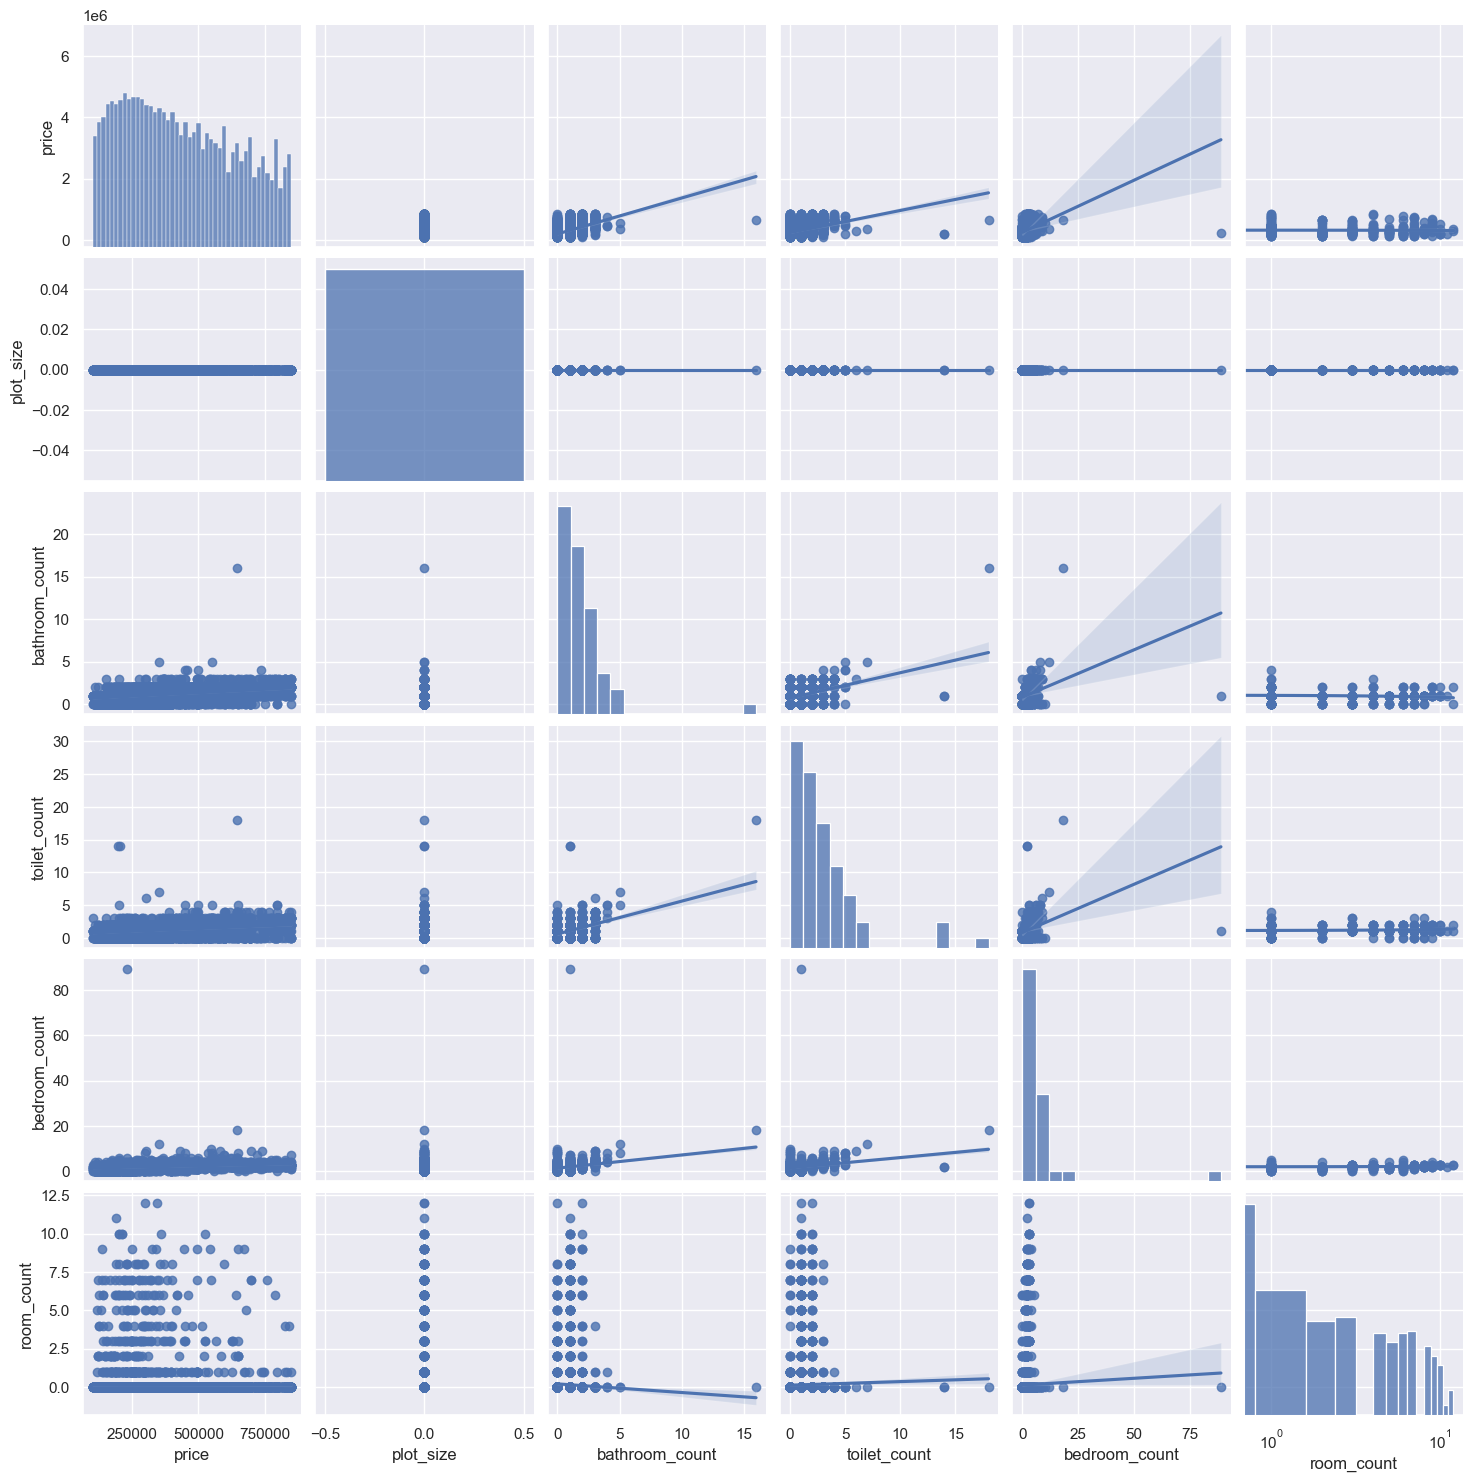

In [180]:
# plotting correlation between price and other variables in pairplot
sns.pairplot(compare_to_price, kind="reg")
plt.xscale("log")
plt.yscale("log")

C:\Users\dimas\AppData\Local\Temp\ipykernel_8932\341124037.py:4: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


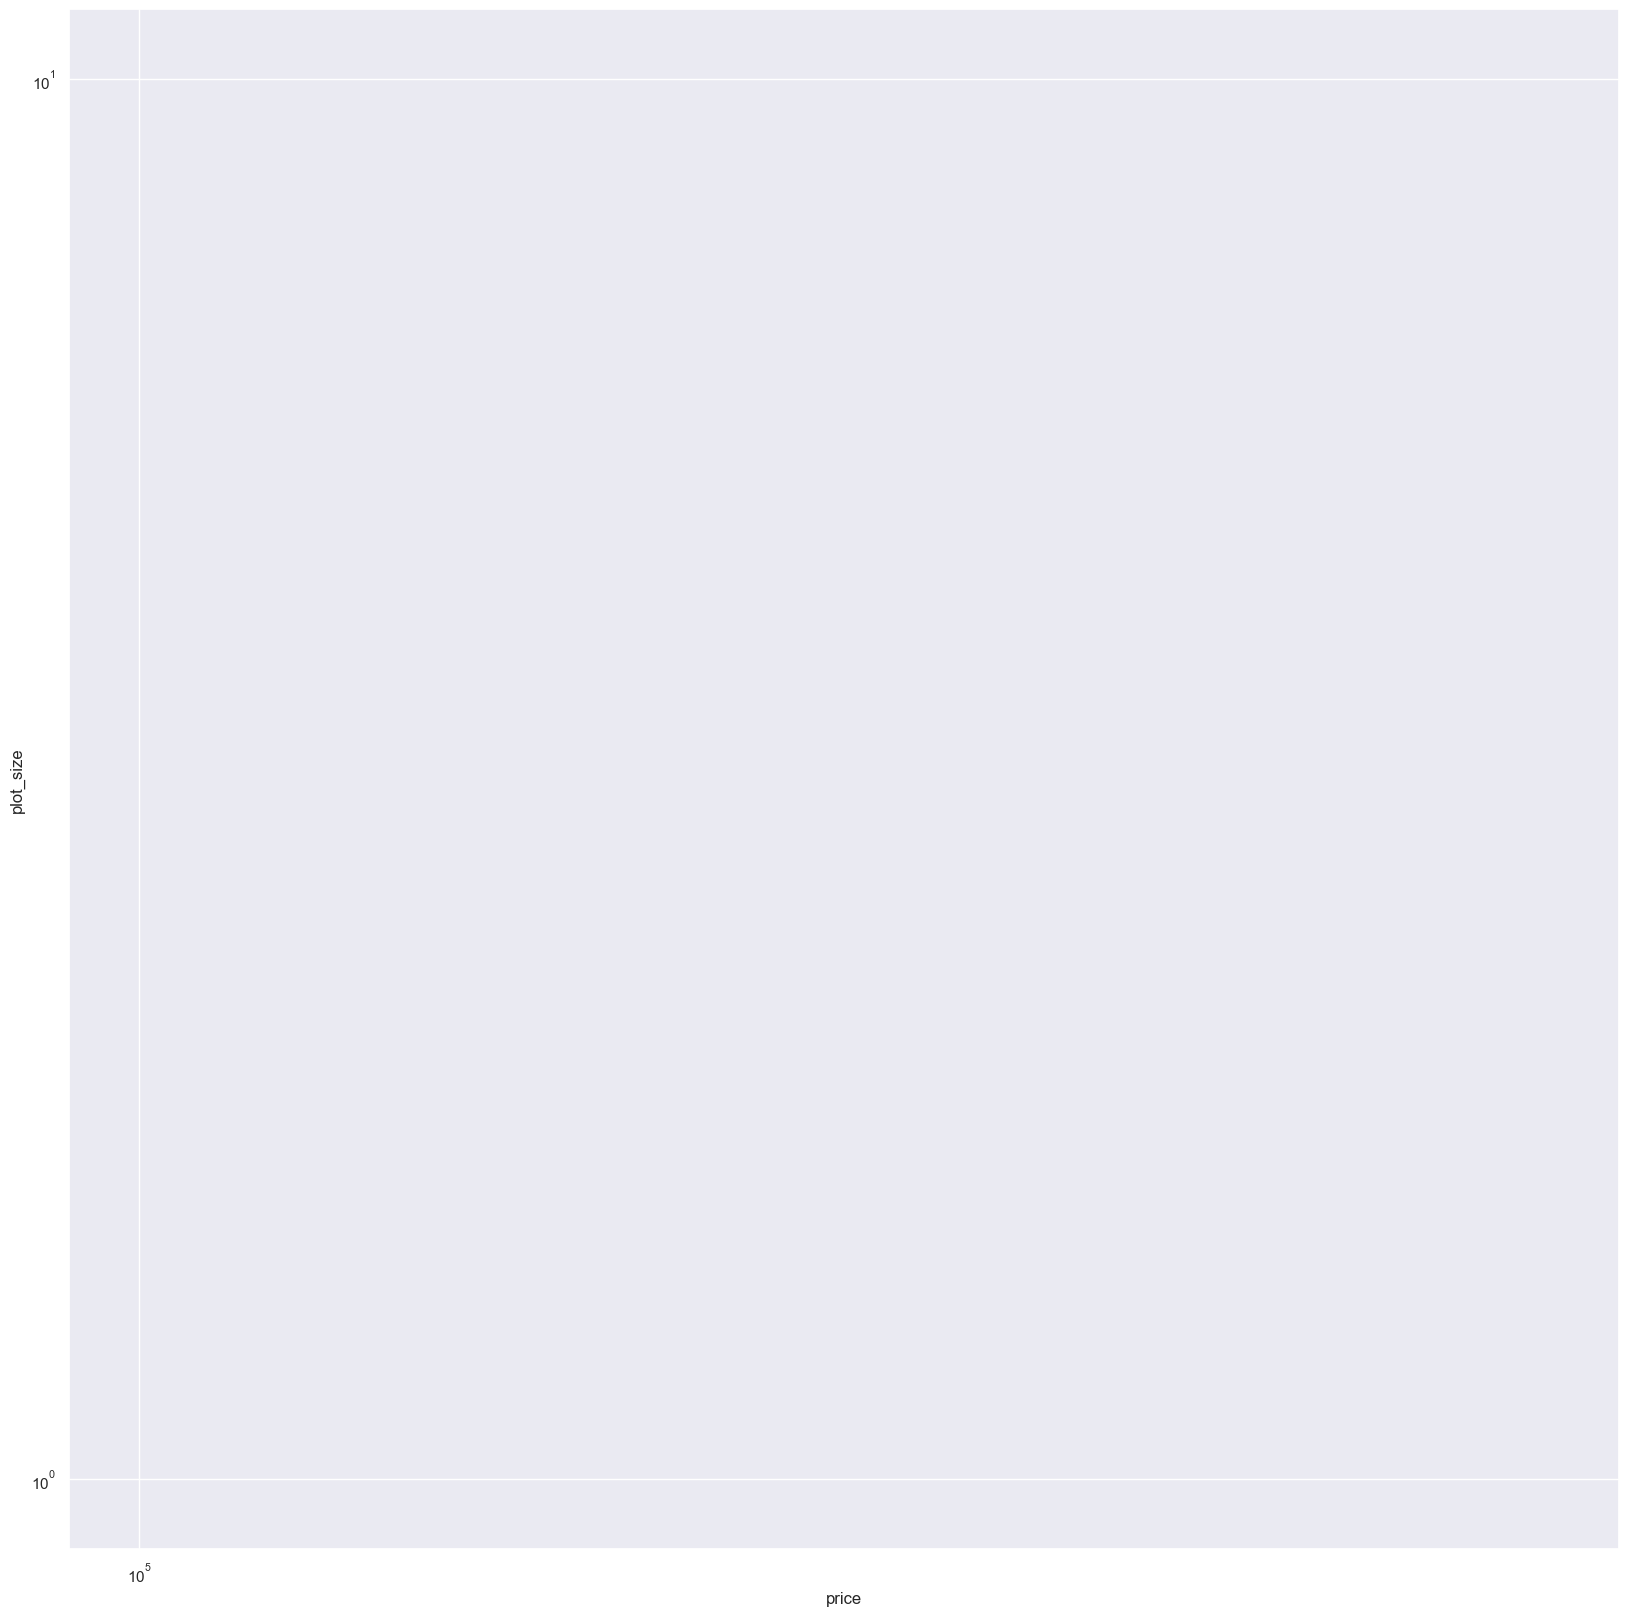

In [181]:
# correlation between price and plot_size
sns.regplot(x=compare_to_price["price"], y=compare_to_price["plot_size"])
plt.xscale("log")
plt.yscale("log")
plt.show()

In [182]:
# grouping df_sale based on "price", "postcode", "district", "province", "region"
grouped_item = pd.DataFrame(resapartments_df[["price", "postcode", "district", "province", "region"]]).reset_index()
del grouped_item["index"]


In [183]:
# Highest Mean Price - In Belgium
grouped_item_district_province = grouped_item.groupby(["district", "province", "region"])
price_region_average = pd.DataFrame(grouped_item_district_province["price"].mean().round().sort_values(ascending=False)).reset_index()
price_region_average["average_price"] = price_region_average["price"]
del price_region_average["price"]

price_region_average[:5]

,district,province,region,average_price
0,Brugge,West Flanders,Flanders,427856.0
1,Brussels,Brussels,Brussels,363379.0
2,Nivelles,Walloon Brabant,Wallonie,348199.0
3,Gent,East Flanders,Flanders,344309.0
4,Veurne,West Flanders,Flanders,342329.0


In [184]:
# Lowest Mean Price - In Belgium
price_region_average[-5:]

,district,province,region,average_price
38,Ieper,West Flanders,Flanders,198598.0
39,Neufchâteau,Luxembourg,Wallonie,196472.0
40,Charleroi,Hainaut,Wallonie,195469.0
41,Thuin,Hainaut,Wallonie,192208.0
42,Philippeville,Namur,Wallonie,167000.0


In [185]:
# Highest Median Price - In Belgium

grouped_item_district_province = grouped_item.groupby(["district", "province", "region"])
price_region_median = pd.DataFrame(grouped_item_district_province["price"].median().round().sort_values(ascending=False)).reset_index()
price_region_median["median_price"] = price_region_median["price"]
del price_region_median["price"]

price_region_median[:5]

,district,province,region,median_price
0,Brugge,West Flanders,Flanders,375000.0
1,Gent,East Flanders,Flanders,328500.0
2,Brussels,Brussels,Brussels,322875.0
3,Nivelles,Walloon Brabant,Wallonie,311000.0
4,Veurne,West Flanders,Flanders,301000.0


In [186]:
# Lowest Median Price - In Belgium
price_region_median[-5:]

,district,province,region,median_price
38,Charleroi,Hainaut,Wallonie,189000.0
39,Mons,Hainaut,Wallonie,185000.0
40,Thuin,Hainaut,Wallonie,179500.0
41,Philippeville,Namur,Wallonie,170000.0
42,Ieper,West Flanders,Flanders,159900.0


In [187]:
# grouping df_sale based on df_sale["province"] and visualising the median price of properties for sale per province in Belgium
province_group = df_sale.groupby("province")
median_province = province_group["price"].median().round()



In [188]:
# Highest Mean Price - In Flanders
grouped_item_district_province = grouped_item.groupby(["district", "province", "region"])
price_region_average = pd.DataFrame(grouped_item_district_province["price"].mean().round().sort_values(ascending=False)).reset_index()
price_region_average["average_price"] = price_region_average["price"]
del price_region_average["price"]

price_region_average[price_region_average["region"] == "Flanders"][:5]

,district,province,region,average_price
0,Brugge,West Flanders,Flanders,427856.0
3,Gent,East Flanders,Flanders,344309.0
4,Veurne,West Flanders,Flanders,342329.0
5,Leuven,Flemish Brabant,Flanders,318446.0
6,Halle-Vilvoorde,Flemish Brabant,Flanders,313438.0


In [190]:
# Lowest Mean Price - In Flanders
price_region_average[price_region_average["region"] == "Flanders"][-5:]

,district,province,region,average_price
20,Tielt,West Flanders,Flanders,267971.0
23,Diksmuide,West Flanders,Flanders,248138.0
30,Tongeren,Limburg,Flanders,225857.0
33,Maaseik,Limburg,Flanders,207698.0
38,Ieper,West Flanders,Flanders,198598.0


In [191]:
# Highest Median Price - In Flanders
grouped_item_district_province = grouped_item.groupby(["district", "province", "region"])
price_region_median = pd.DataFrame(grouped_item_district_province["price"].median().round().sort_values(ascending=False)).reset_index()
price_region_median["median_price"] = price_region_median["price"]
del price_region_median["price"]

price_region_median[price_region_median["region"] == "Flanders"][:5]

,district,province,region,median_price
0,Brugge,West Flanders,Flanders,375000.0
1,Gent,East Flanders,Flanders,328500.0
4,Veurne,West Flanders,Flanders,301000.0
5,Leuven,Flemish Brabant,Flanders,297400.0
6,Halle-Vilvoorde,Flemish Brabant,Flanders,292500.0


In [192]:
# Lowest Median Price - In Flanders
price_region_median[price_region_median["region"] == "Flanders"][-5:]

,district,province,region,median_price
23,Oostend,West Flanders,Flanders,239750.0
26,Tongeren,Limburg,Flanders,218250.0
29,Diksmuide,West Flanders,Flanders,208000.0
33,Maaseik,Limburg,Flanders,197876.0
42,Ieper,West Flanders,Flanders,159900.0


In [193]:
# Highest Mean Price - In Wallonie
grouped_item_district_province = grouped_item.groupby(["district", "province", "region"])
price_region_average = pd.DataFrame(grouped_item_district_province["price"].mean().round().sort_values(ascending=False)).reset_index()
price_region_average["average_price"] = price_region_average["price"]
del price_region_average["price"]

price_region_average[price_region_average["region"] == "Wallonie"][:5]

,district,province,region,average_price
2,Nivelles,Walloon Brabant,Wallonie,348199.0
17,Arlon,Luxembourg,Wallonie,270789.0
21,Bastogne,Luxembourg,Wallonie,265447.0
22,Waremme,Liège,Wallonie,264167.0
24,Namur,Namur,Wallonie,244693.0


In [194]:
# Lowest Mean Price - In Wallonie
price_region_average[price_region_average["region"] == "Wallonie"][-5:]

,district,province,region,average_price
37,Soignies,Hainaut,Wallonie,200102.0
39,Neufchâteau,Luxembourg,Wallonie,196472.0
40,Charleroi,Hainaut,Wallonie,195469.0
41,Thuin,Hainaut,Wallonie,192208.0
42,Philippeville,Namur,Wallonie,167000.0


In [195]:
# Highest Median Price - In Wallonie
grouped_item_district_province = grouped_item.groupby(["district", "province", "region"])
price_region_median = pd.DataFrame(grouped_item_district_province["price"].median().round().sort_values(ascending=False)).reset_index()
price_region_median["median_price"] = price_region_median["price"]
del price_region_median["price"]

price_region_median[price_region_median["region"] == "Wallonie"][:5]

,district,province,region,median_price
3,Nivelles,Walloon Brabant,Wallonie,311000.0
8,Arlon,Luxembourg,Wallonie,280000.0
13,Bastogne,Luxembourg,Wallonie,259500.0
16,Waremme,Liège,Wallonie,254500.0
22,Virton,Luxembourg,Wallonie,239900.0


In [196]:
# Lowest Median Price - In Wallonie
price_region_median[price_region_median["region"] == "Wallonie"][-5:]

,district,province,region,median_price
37,Dinant,Namur,Wallonie,189000.0
38,Charleroi,Hainaut,Wallonie,189000.0
39,Mons,Hainaut,Wallonie,185000.0
40,Thuin,Hainaut,Wallonie,179500.0
41,Philippeville,Namur,Wallonie,170000.0


Due to time constraint, the author regrets that it is not possible to provide analysis on price per square meter in various municipalities in Belgium